## Proposed Problem Statement

### Creating a Prediction Model for Real Estate Agents to predict HDB Resale Prices
Scenario
- You are assisting the Real Estate Agents in identifying:
- Which structural factors most drive prices,
- Which towns are becoming unaffordable fastest,
- Which flat characteristics need intervention (e.g., older flats with steep depreciation).


### Deliverables
An interactive prediction model where Real Estate Agents ... (tbc)

- Towns where remaining lease has the steepest price penalty.
- Flat types most sensitive to market fluctuations.
- Predictive model that flags likely future affordability issues.


Deliverable Form:
- Affordability & Price Driver Insights (EDA Findings) - Graphs and commentary

- Predictive Model for Resale Prices - ML Intepretable Model and ML Metrics

In [ ]:
from pathlib import Path
print(Path("Tommy Ver(main)_updated.ipynb").resolve())

/content/Tommy Ver(main)_updated.ipynb


## STEP 1: DATA LOADING AND CLEANING

Load Libraries (Importing Foundational Libraries)


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

Importing Key Functions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

Loading Dataset

In [ ]:
# Load dataset
df = pd.read_csv('HDB_Resale_Prices.csv')

In [ ]:
df1 = pd.read_csv('HDB_Resale_Prices.csv')

In [ ]:
df1['flat_type'].unique()
df1['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room', '3Gen'],
      dtype=object)

Using df.head() and df.sample() to get a quick look into Dataset

In [ ]:
# Quick view of first 10 rows of Dataset
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [ ]:
# Quick view of random 10 rows of Dataset
df.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
114708,2021-12,BUKIT PANJANG,4 ROOM,442C,FAJAR RD,16 TO 18,93.0,Model A,2016,94 years 01 month,535000.0
157568,2023-07,QUEENSTOWN,4 ROOM,11,HOLLAND DR,19 TO 21,88.0,Improved,1975,50 years 07 months,618888.0
178834,2024-05,BUKIT MERAH,5 ROOM,87,REDHILL CL,16 TO 18,126.0,Improved,1995,69 years 08 months,1028000.0
143262,2022-12,YISHUN,3 ROOM,741,YISHUN AVE 5,01 TO 03,67.0,New Generation,1985,61 years 03 months,360000.0
84051,2020-11,PASIR RIS,EXECUTIVE,710,PASIR RIS ST 72,04 TO 06,148.0,Apartment,1996,74 years 08 months,630000.0
108183,2021-09,PUNGGOL,5 ROOM,677A,PUNGGOL DR,07 TO 09,113.0,Premium Apartment,2016,94 years 01 month,692000.0
95707,2021-04,JURONG WEST,5 ROOM,675A,JURONG WEST ST 64,13 TO 15,110.0,Premium Apartment,2008,86 years 02 months,480000.0
188792,2024-09,BEDOK,EXECUTIVE,104,LENGKONG TIGA,01 TO 03,146.0,Maisonette,1989,63 years 06 months,1060000.0
85704,2020-12,CHOA CHU KANG,3 ROOM,807A,CHOA CHU KANG AVE 1,10 TO 12,67.0,Model A,2017,95 years 05 months,355000.0
98128,2021-05,PUNGGOL,4 ROOM,662B,EDGEDALE PLAINS,10 TO 12,92.0,Premium Apartment,2017,95 years 01 month,492000.0


Using df.shape, df.info and df.describe to understand Data

In [ ]:
df.shape # Pulls number of rows and cols (r,c)

(194170, 11)

In [ ]:
df.info() # Pulls info overview of Dataframe -- take note of inconsistencies in Dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                194170 non-null  object 
 1   town                 194170 non-null  object 
 2   flat_type            194170 non-null  object 
 3   block                194170 non-null  object 
 4   street_name          194170 non-null  object 
 5   storey_range         194170 non-null  object 
 6   floor_area_sqm       194170 non-null  float64
 7   flat_model           194170 non-null  object 
 8   lease_commence_date  194170 non-null  int64  
 9   remaining_lease      194170 non-null  object 
 10  resale_price         194170 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 16.3+ MB


In [ ]:
df.describe() # Shows stats summary for numerical values

,floor_area_sqm,lease_commence_date,resale_price,latitude,longitude
count,194170.000000,194170.000000,1.941700e+05,194170.000000,194170.000000
mean,97.032377,1996.159196,5.062432e+05,1.368064,103.841346
std,24.041678,14.129136,1.768102e+05,0.042856,0.071056
min,31.000000,1966.000000,1.400000e+05,1.270380,103.685228
25%,82.000000,1985.000000,3.750000e+05,1.337377,103.780456
50%,93.000000,1996.000000,4.750000e+05,1.367893,103.846419
75%,112.000000,2011.000000,6.050000e+05,1.396627,103.898920
max,366.700000,2021.000000,1.588000e+06,1.457071,103.987805


### 1.1 Tackling Duplicates and Null Values

Checking for Total No. of Duplicates using df.duplicated().sum()

In [ ]:
df.duplicated().sum() # Checking for total number of duplicates -- Note after running code: Found that duplicates are present (Question: Is it normal for this Dataset?)

np.int64(294)

Solving Duplicates, is it meant to be there?

In [ ]:
duplicate_rows = df[df.duplicated(keep=False)] # Create an inspectable subset of duplicated rows to check
duplicate_rows

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
224,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
243,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0
304,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
305,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0
505,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0
...,...,...,...,...,...,...,...,...,...,...,...
190108,2024-09,SENGKANG,3 ROOM,471C,FERNVALE ST,01 TO 03,68.0,Model A,2016,91 years 01 month,475000.0
192280,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0
192283,2024-10,SENGKANG,4 ROOM,329B,ANCHORVALE ST,10 TO 12,93.0,Model A,2015,89 years 11 months,695000.0
193189,2024-11,BUKIT PANJANG,5 ROOM,210,PETIR RD,07 TO 09,122.0,Improved,1988,62 years 08 months,650000.0


Analysing duplicate_rows subset

In [ ]:
duplicate_counts = duplicate_rows.value_counts().reset_index(name='count')
duplicate_counts #Confirming 294 rows of duplicates , and showcasing how many counts of duplicates per type.

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,count
0,2024-11,BUKIT PANJANG,5 ROOM,210,PETIR RD,07 TO 09,122.0,Improved,1988,62 years 08 months,650000.0,2
1,2017-01,BUKIT MERAH,4 ROOM,106,HENDERSON CRES,07 TO 09,81.0,Improved,1975,57 years,470000.0,2
2,2017-01,CENTRAL AREA,3 ROOM,271,QUEEN ST,16 TO 18,68.0,Improved,1979,61 years 02 months,470000.0,2
3,2017-01,JURONG EAST,4 ROOM,265,TOH GUAN RD,04 TO 06,101.0,Model A,1998,80 years 09 months,470000.0,2
4,2017-01,JURONG WEST,4 ROOM,337A,TAH CHING RD,19 TO 21,92.0,Model A,2010,92 years 03 months,470000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
289,2017-02,MARINE PARADE,4 ROOM,18,MARINE TER,04 TO 06,88.0,Improved,1975,57 years 03 months,468000.0,2
290,2017-02,BEDOK,4 ROOM,156,BEDOK STH AVE 3,10 TO 12,84.0,Simplified,1985,67 years 10 months,470000.0,2
291,2017-01,SENGKANG,4 ROOM,183D,RIVERVALE CRES,04 TO 06,85.0,Model A2,2003,85 years 05 months,345000.0,2
292,2017-01,PUNGGOL,5 ROOM,171C,EDGEDALE PLAINS,16 TO 18,110.0,Improved,2004,86 years 02 months,468000.0,2


In [ ]:
duplicate_rows.nunique() # Result shows that duplicates are generally very different across multiple categories

,0
month,72
town,25
flat_type,6
block,265
street_name,170
storey_range,12
floor_area_sqm,63
flat_model,9
lease_commence_date,47
remaining_lease,194


After analysing duplicates, as Dataset has not unique identifiers in each row (such as specific unit numbers): We will accept duplicates as valid.

Using df.columns to see each column name

In [ ]:
df.columns # Pulls each column name

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

Check for Missing Values (Nan)

In [ ]:
# Checking missing values per column
df.isna().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
remaining_lease,0


In [ ]:
# Results show no missing column

In [ ]:
#df.dropna(subset=['resale_price'], inplace=True)
#df.isna().sum()

In [ ]:
# Results show 1 row dropped

### STEP 2: Exploratory Data Analysis (EDA)

Begin EDA - Categorising Columns by Numerical and Categorical

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns # Creating categorical columns by selecting Columns that are dtype ('object')
categorical_cols

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'remaining_lease'],
      dtype='object')

Understanding each Categorical Column and its unique values

In [ ]:
for col in categorical_cols: # Pulling categorical columns, unique values per column and showing them in a presentabl format
    print("="*60)
    print(f"Column: {col}")
    print(f"Total unique values: {df[col].nunique()}")
    print("- Unique values:")
    print(df[col].unique())
    print("="*60 + "\n")

Column: month
Total unique values: 95
- Unique values:
['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018-03' '2018-04' '2018-05' '2018-06' '2018-07' '2018-08' '2018-09'
 '2018-10' '2018-11' '2018-12' '2019-01' '2019-02' '2019-03' '2019-04'
 '2019-05' '2019-06' '2019-07' '2019-08' '2019-09' '2019-10' '2019-11'
 '2019-12' '2020-01' '2020-02' '2020-03' '2020-04' '2020-05' '2020-06'
 '2020-07' '2020-08' '2020-09' '2020-10' '2020-11' '2020-12' '2021-01'
 '2021-02' '2021-03' '2021-04' '2021-05' '2021-06' '2021-07' '2021-08'
 '2021-09' '2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03'
 '2022-04' '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10'
 '2022-11' '2022-12' '2023-01' '2023-02' '2023-03' '2023-04' '2023-05'
 '2023-06' '2023-07' '2023-08' '2023-09' '2023-10' '2023-11' '2023-12'
 '2024-01' '2024-02' '2024-03' '2024-04' '2024-05' '2024-06' '2024-07'
 '2024-08' '2024-09' '

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns # Creating a list of numerical columns by selecting Columns that are dtype ('np.numbers' = anything considered a numerical type by NumPy)
numerical_cols

Index(['floor_area_sqm', 'lease_commence_date', 'resale_price'], dtype='object')

In [ ]:
for num in numerical_cols:
    print("="*60)
    print(f"Column: {num}")
    print(f"Total unique values: {df[num].nunique()}")
    print("- Unique values:")
    print(df[num].unique())
    print("="*60 + "\n")

Column: floor_area_sqm
Total unique values: 178
- Unique values:
[ 44.   67.   68.   73.   74.   82.   81.   92.   91.   94.   98.   97.
  99.   90.  117.  119.  118.  112.  121.  147.   45.   59.   63.   70.
  60.   65.   75.   66.   84.   93.  104.  105.  120.  130.  132.  115.
 122.  137.  139.  143.  146.  145.  141.   64.   83.  108.   95.  123.
  69.  103.  102.  100.  107.   86.  101.  150.  155.  144.   34.   51.
  54.   58.   76.   88.   77.  106.   85.   89.  134.  110.  111.  151.
  55.  113.  126.  124.  131.  142.   42.   46.   56.   61.   57.   72.
 109.   47.   96.  116.  128.  140.  148.  156.  157.   71.   52.   79.
 129.  133.  125.   48.   62.  114.   87.  127.  161.  165.   50.  153.
  43.  138.  164.  163.  136.  149.   80.  154.  152.   37.   78.  135.
 170.  192.  182.   31.   49.   53.   60.3 176.  177.  189.   40.  166.
 184.  173.  169.  181.  158.   41.  159.  215.  174.   63.1 179.  162.
  83.1 172.  168.  160.  249.  185.   38.  178.  171.  237.  183.  190.

### STEP 2.1
- price_per_sqm = resale_price / floor_area_sqm
- flat_age = trans_year - lease_commence_date
- changing remaining_lease (string/object) into remaining_lease_years (float)

Price Per SQM Column
- Important feature to have as it puts resale_price into scale for different sized flats

In [ ]:
df_upd = df.copy()
df_upd['price_per_sqm'] = df_upd['resale_price'] / df_upd['floor_area_sqm']
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm
128546,2022-06,JURONG WEST,3 ROOM,187,BOON LAY AVE,16 TO 18,59.0,Improved,1978,55 years 02 months,285000.0,4830.508475
23019,2018-03,BUKIT BATOK,3 ROOM,312,BT BATOK ST 32,04 TO 06,68.0,New Generation,1985,66 years 04 months,280000.0,4117.647059
124089,2022-04,HOUGANG,4 ROOM,980C,BUANGKOK CRES,10 TO 12,85.0,Model A2,2003,80 years 01 month,435000.0,5117.647059
60054,2019-10,TAMPINES,EXECUTIVE,860,TAMPINES AVE 5,07 TO 09,146.0,Maisonette,1987,67 years 01 month,755000.0,5171.232877
125732,2022-05,BEDOK,4 ROOM,219A,BEDOK CTRL,04 TO 06,97.0,Model A,2010,87 years 01 month,728000.0,7505.154639
183952,2024-07,GEYLANG,3 ROOM,41,SIMS DR,04 TO 06,66.0,Improved,1981,55 years 10 months,357888.0,5422.545455
98518,2021-05,SERANGOON,4 ROOM,540,SERANGOON NTH AVE 4,04 TO 06,104.0,Model A,1992,70 years 07 months,415000.0,3990.384615
90262,2021-02,BEDOK,5 ROOM,670,JLN DAMAI,10 TO 12,125.0,Improved,1996,74 years 08 months,625000.0,5000.000000
36950,2018-10,BEDOK,4 ROOM,159,BEDOK STH AVE 3,04 TO 06,105.0,Model A,1985,65 years 05 months,472000.0,4495.238095
61675,2019-11,SENGKANG,3 ROOM,329A,ANCHORVALE ST,13 TO 15,67.0,Model A,2015,94 years 09 months,375000.0,5597.014925


Flat Age (trans_year) - (remaining_lease_years)
- Add Transaction Year ('trans_year') into the Dataframe from datetime Column 'Month'
- Add in Flat Age : Easier feature to analyse when it comes to 'age' of flat / longevity / lifespan

In [ ]:
# Extract the transaction year from the 'month' column
df_upd['trans_year'] = pd.to_datetime(df_upd['month']).dt.year

# Calculate flat_age
df_upd['flat_age'] = df_upd['trans_year'] - df_upd['lease_commence_date']

# Display a sample of the updated DataFrame with the new 'flat_age' column
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,trans_year,flat_age
148000,2023-03,BISHAN,4 ROOM,146,BISHAN ST 11,01 TO 03,84.0,Simplified,1987,63 years 06 months,468000.0,5571.428571,2023,36
77331,2020-08,TAMPINES,3 ROOM,494E,TAMPINES ST 43,07 TO 09,68.0,Model A,2015,94 years 02 months,370000.0,5441.176471,2020,5
24902,2018-04,BUKIT BATOK,3 ROOM,212,BT BATOK ST 21,07 TO 09,69.0,New Generation,1985,66 years 05 months,266888.0,3867.942029,2018,33
156911,2023-07,CLEMENTI,5 ROOM,312B,CLEMENTI AVE 4,19 TO 21,113.0,Improved,2017,93 years 03 months,1145000.0,10132.743363,2023,6
88563,2021-01,JURONG EAST,4 ROOM,231,JURONG EAST ST 21,01 TO 03,91.0,New Generation,1981,59 years 06 months,373000.0,4098.901099,2021,40
73657,2020-07,CHOA CHU KANG,5 ROOM,671A,CHOA CHU KANG CRES,16 TO 18,124.0,Premium Apartment,2000,78 years 07 months,435000.0,3508.064516,2020,20
187141,2024-08,JURONG WEST,4 ROOM,643,JURONG WEST ST 61,01 TO 03,93.0,Model A2,1998,72 years 10 months,500000.0,5376.344086,2024,26
179160,2024-05,HOUGANG,2 ROOM,987B,BUANGKOK GREEN,04 TO 06,47.0,Model A,2015,89 years 09 months,340000.0,7234.042553,2024,9
38194,2018-10,SENGKANG,5 ROOM,314B,ANCHORVALE LINK,07 TO 09,110.0,Premium Apartment,2003,84 years,432000.0,3927.272727,2018,15
101759,2021-07,BUKIT PANJANG,3 ROOM,119,PENDING RD,04 TO 06,64.0,Simplified,1988,66 years 05 months,308888.0,4826.375000,2021,33


Making Remaining Lease Years into a Float Dtype
- Measures Remaining Lease by Years instead of String / Object

In [ ]:
def parse_remaining_lease(lease_str):
    if pd.isna(lease_str):
        return np.nan

    parts = lease_str.replace('years', '').replace('year', '').replace('months', '').replace('month', '').split()
    years = 0
    months = 0

    if len(parts) >= 1 and parts[0].isdigit():
        years = int(parts[0])
    # Check if months part exists and is a digit. It might be at index 1 or 2 depending on 'years' presence.
    if len(parts) == 2 and parts[1].isdigit(): # Case like '60 years'
        pass # months remains 0
    elif len(parts) == 3 and parts[2].isdigit(): # Case like '60 years 07 months'
        months = int(parts[1])
    elif len(parts) == 2 and parts[1] == 'months': # Case like '07 months'
        months = int(parts[0])

    return float(years + months / 12)

# Apply the parsing function to 'remaining_lease' in df_upd
df_upd['remaining_lease_years'] = df_upd['remaining_lease'].apply(parse_remaining_lease)
display(df_upd.sample(10))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
137487,2022-10,BUKIT PANJANG,EXECUTIVE,107,GANGSA RD,10 TO 12,146.0,Maisonette,1987,64 years,798000.0,5465.753425,2022,35,64.0
16530,2017-10,TAMPINES,3 ROOM,269,TAMPINES ST 21,01 TO 03,75.0,Model A,1984,65 years 05 months,343000.0,4573.333333,2017,33,65.0
183718,2024-07,CHOA CHU KANG,3 ROOM,802A,KEAT HONG CL,04 TO 06,67.0,Model A,2018,92 years 08 months,460000.0,6865.671642,2024,6,92.0
146688,2023-02,JURONG WEST,3 ROOM,121,YUAN CHING RD,04 TO 06,61.0,Improved,1974,50 years 06 months,292000.0,4786.885246,2023,49,50.0
6709,2017-05,HOUGANG,4 ROOM,109,HOUGANG AVE 1,04 TO 06,93.0,New Generation,1983,64 years 10 months,366500.0,3940.860215,2017,34,64.0
99577,2021-06,CHOA CHU KANG,5 ROOM,816A,KEAT HONG LINK,01 TO 03,112.0,Improved,2017,95 years 04 months,530000.0,4732.142857,2021,4,95.0
122622,2022-03,SENGKANG,4 ROOM,471C,FERNVALE ST,04 TO 06,93.0,Model A,2016,93 years 06 months,482000.0,5182.795699,2022,6,93.0
48065,2019-04,TAMPINES,4 ROOM,265,TAMPINES ST 21,04 TO 06,105.0,Model A,1984,64 years 05 months,430000.0,4095.238095,2019,35,64.0
190188,2024-09,SENGKANG,4 ROOM,282A,SENGKANG EAST AVE,07 TO 09,92.0,Premium Apartment,2015,90 years,785000.0,8532.608696,2024,9,90.0
187147,2024-08,JURONG WEST,4 ROOM,759,JURONG WEST ST 74,04 TO 06,109.0,Model A,1996,71 years 02 months,518000.0,4752.293578,2024,28,71.0


### Dropping Columns from the Dataframe
- Dropping Remaining_Lease (string)

In [ ]:
df_upd = df_upd.drop('remaining_lease', axis=1)
display(df_upd.head())

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,5272.727273,2017,38,61.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,3731.343284,2017,39,60.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,3910.447761,2017,37,62.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,3897.058824,2017,37,62.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,3955.223881,2017,37,62.0


## STEP 3.1: The Overview of the HDB Resale Market


### Understanding the Current State of the HDB Resale Market



## Market Health & Affordability
- What is the current price landscape?
- Is the marketing becoming More or Less affordable?
- What are people buying? What types of flats are most popular?

### What is the current price landscape?
- Resale Price Distribution Nationwide
- Median Price per **sqm**

### Resale Price Distribution Nationwide

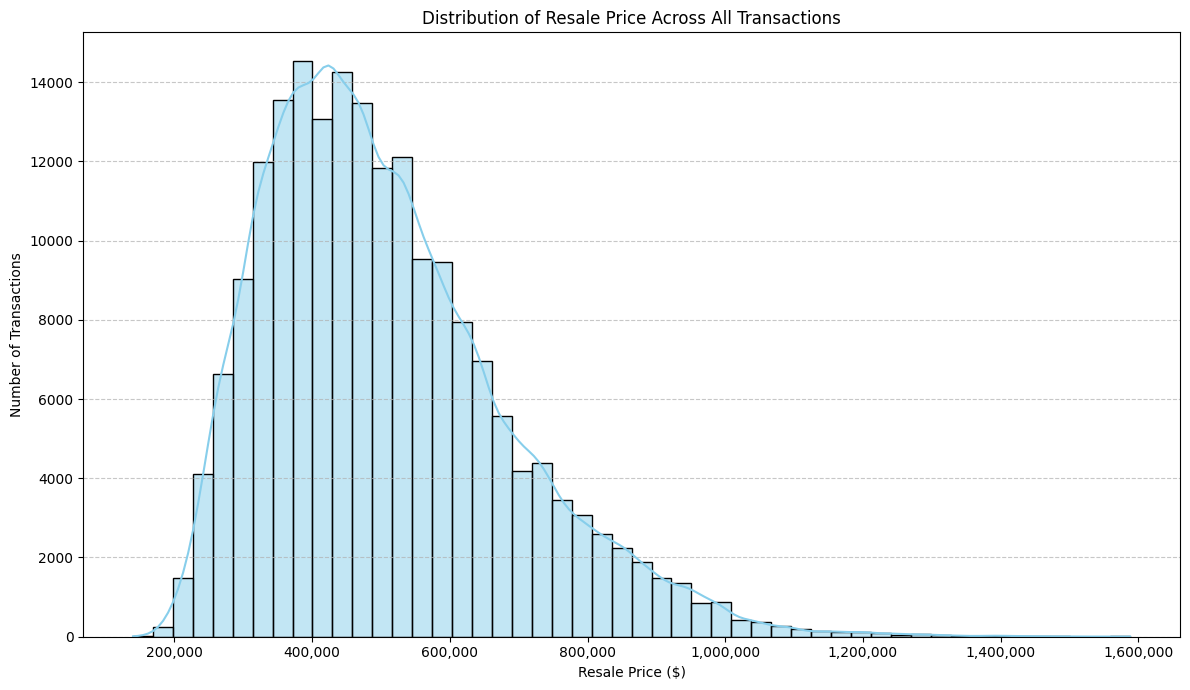

In [ ]:
plt.figure(figsize=(12, 7))
sns.histplot(df_upd['resale_price'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Resale Price Across All Transactions')
plt.xlabel('Resale Price ($)')
plt.ylabel('Number of Transactions')

# Format x-axis to display readable numbers
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Results from Histogram:
- Right-skewed distribution = Higher no. of transactions at the lower resale price.
- Presence of higher resale price are rarer.
- Median is a better measure as compared to Mean due to outliers

What it means for the HDB Market?
- Most demand falls under the flats that lie within the $400,000 range.


### Number of Transactions Over Time - Is the Demand increasing?

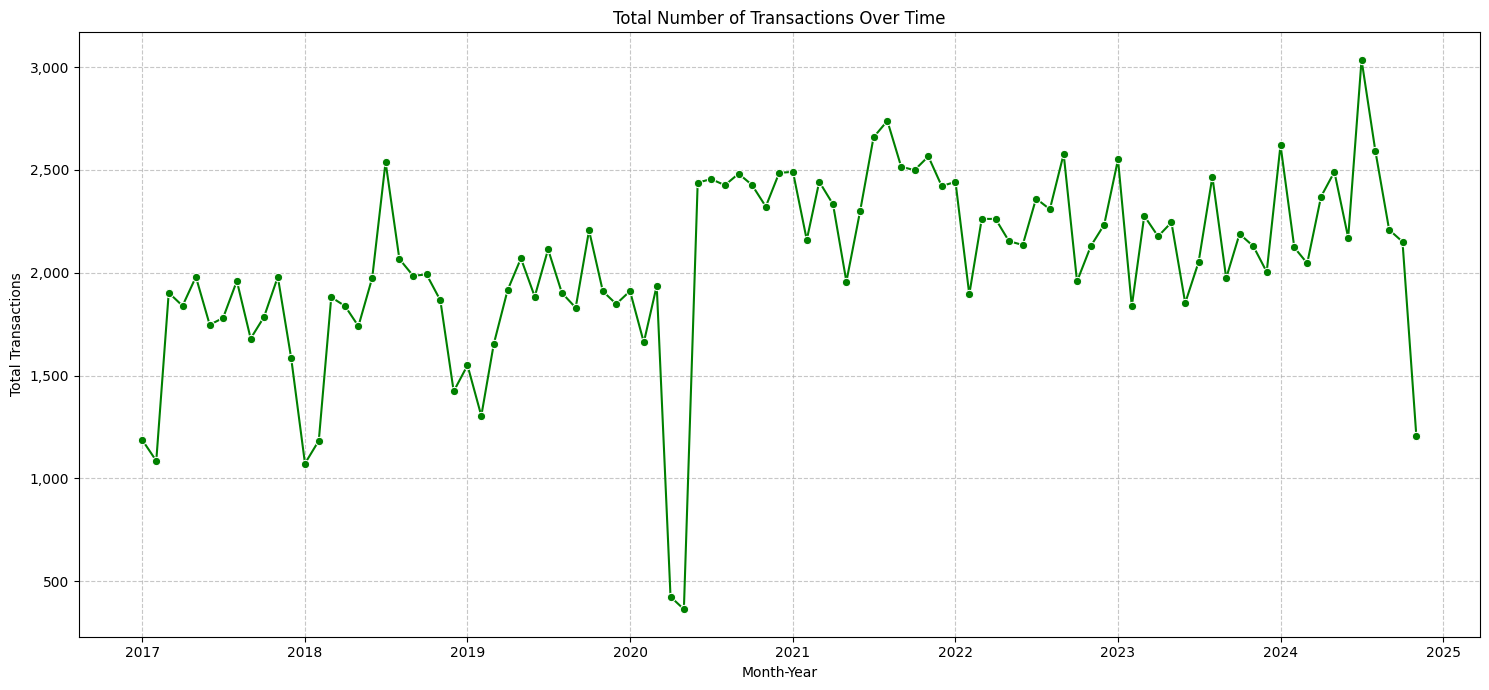

In [ ]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Count total transactions per month
transaction_counts = df_upd.groupby('month').size().reset_index(name='total_transactions')

plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='total_transactions', data=transaction_counts, marker='o', color='green')

plt.title('Total Number of Transactions Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Transactions')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Median Price Analysis
- What is the Median Price Overall
- What is the Median Price per SQM Overall

In [ ]:
median_resale_price = df_upd['resale_price'].median()
median_price_per_sqm = df_upd['price_per_sqm'].median()

print(f"Median Resale Price across All Transactions: ${median_resale_price:,.2f}")
print(f"Median Price Per SQM across All Transactions: ${median_price_per_sqm:,.2f}")


Median Resale Price across All Transactions: $475,000.00
Median Price Per SQM across All Transactions: $5,000.00


### Is the HDB Resale Market getting MORE or LESS Affordable?

- Median Per Sqm Price Over-time

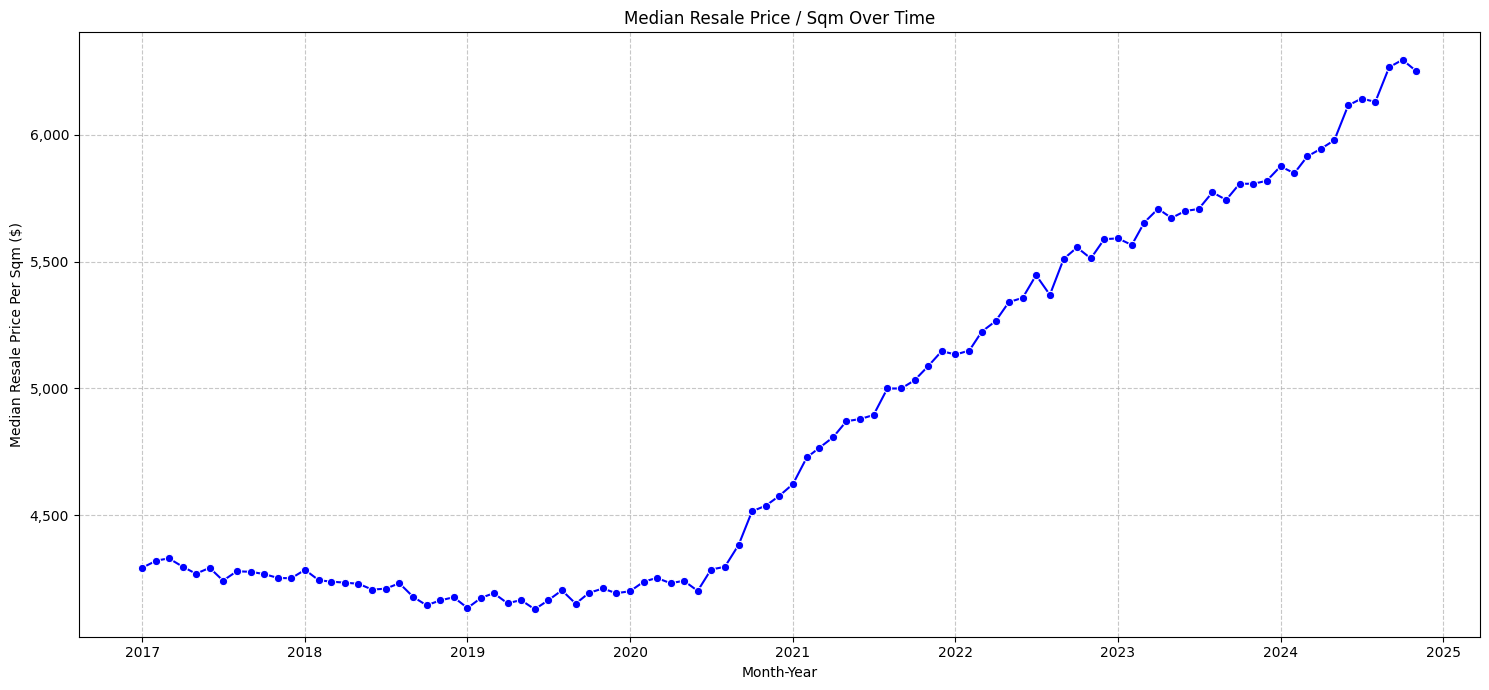

In [ ]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate median resale price per sqm per month
median_price_per_sqm_over_time = df_upd.groupby('month')['price_per_sqm'].median().reset_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='price_per_sqm', data=median_price_per_sqm_over_time, marker='o', color='blue')

plt.title('Median Resale Price / Sqm Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Calculate Inflation Rate for Median Per Sqm Price from 2020 onwards

In [ ]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Recalculate median price per sqm per month
median_price_per_sqm_overtime = df_upd.groupby('month')['price_per_sqm'].median().reset_index()

# Filter data for the years 2020 to 2025
filtered_median_per_sqm_yearly = median_price_per_sqm_overtime[
    (median_price_per_sqm_overtime['month'].dt.year >= 2020) &
    (median_price_per_sqm_overtime['month'].dt.year <= 2025)
].copy()

# Resample to get yearly median prices. Taking the median of the monthly medians for each year.
yearly_median_sqm_price = filtered_median_per_sqm_yearly.set_index('month').resample('YE')['price_per_sqm'].median().reset_index()
yearly_median_sqm_price['year'] = yearly_median_sqm_price['month'].dt.year

# Calculate the annual inflation rate (percentage change year over year)
yearly_median_sqm_price['inflation_rate_pps'] = yearly_median_sqm_price['price_per_sqm'].pct_change() * 100

print("Annual Inflation Rate of Median Price Per Sqm (2020-2025):")
display(yearly_median_sqm_price[['year', 'price_per_sqm', 'inflation_rate_pps']].round(2))

Annual Inflation Rate of Median Price Per Sqm (2020-2025):


,year,price_per_sqm,inflation_rate_pps
0,2020,4270.33,NaN
1,2021,4887.65,14.46
2,2022,5363.00,9.73
3,2023,5707.44,6.42
4,2024,6115.11,7.14


Long-term Trend - Compound Annual Growth Rate (CAGR)



In [ ]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate yearly median resale price
yearly_median_resale_price_overall = df_upd.groupby(df_upd['month'].dt.year)['resale_price'].median().reset_index()
yearly_median_resale_price_overall.columns = ['year', 'median_resale_price']

# Calculate yearly median price per sqm
yearly_median_price_per_sqm_overall = df_upd.groupby(df_upd['month'].dt.year)['price_per_sqm'].median().reset_index()
yearly_median_price_per_sqm_overall.columns = ['year', 'median_price_per_sqm']

# Define start and end years
start_year = 2017
end_year = yearly_median_resale_price_overall['year'].max() # Get the latest year from the data

# Filter for start and end years
start_price = yearly_median_resale_price_overall[yearly_median_resale_price_overall['year'] == start_year]['median_resale_price'].iloc[0]
end_price = yearly_median_resale_price_overall[yearly_median_resale_price_overall['year'] == end_year]['median_resale_price'].iloc[0]

start_price_per_sqm = yearly_median_price_per_sqm_overall[yearly_median_price_per_sqm_overall['year'] == start_year]['median_price_per_sqm'].iloc[0]
end_price_per_sqm = yearly_median_price_per_sqm_overall[yearly_median_price_per_sqm_overall['year'] == end_year]['median_price_per_sqm'].iloc[0]

# Calculate number of periods
num_years = end_year - start_year

# Calculate CAGR for Median Resale Price
cagr_resale_price = ((end_price / start_price)**(1/num_years) - 1) * 100

# Calculate CAGR for Median Price Per Sqm
cagr_price_per_sqm = ((end_price_per_sqm / start_price_per_sqm)**(1/num_years) - 1) * 100


print(f"CAGR of Median Price Per Sqm ({start_year}-{end_year}): {cagr_price_per_sqm:.2f}%")

CAGR of Median Price Per Sqm (2017-2024): 5.11%


### Findings:
- Overall Median Prices over time show an upward trend from 2020 onwards
- However, since 2020, Price Inflation has been showing decreasing trends
- CAGR of Median Prices are around 5%, meaning as of the 2020, the Inflation Rate is still increasing at a greater rate than the CAGR --> **Indicative of Housing becoming Less Affordable.**


## STEP 3.2: STRUCTURAL DRIVERS
- What are the sturctural / physical factors of the houses that people are buying and why are they buying them?


### What are people buying?
- What _______ is most transacted?
  1. Flat Type
  2. Flat Size
  3. Flat Model

  

Flat Type Distribution

Number of flats per flat_type:


,count
flat_type,
4 ROOM,81967
5 ROOM,48091
3 ROOM,46071
EXECUTIVE,14301
2 ROOM,3586
MULTI-GENERATION,80
1 ROOM,74


/tmp/ipython-input-2508281703.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_upd['flat_type'], order=df_upd['flat_type'].value_counts().index, palette='viridis', legend=False)


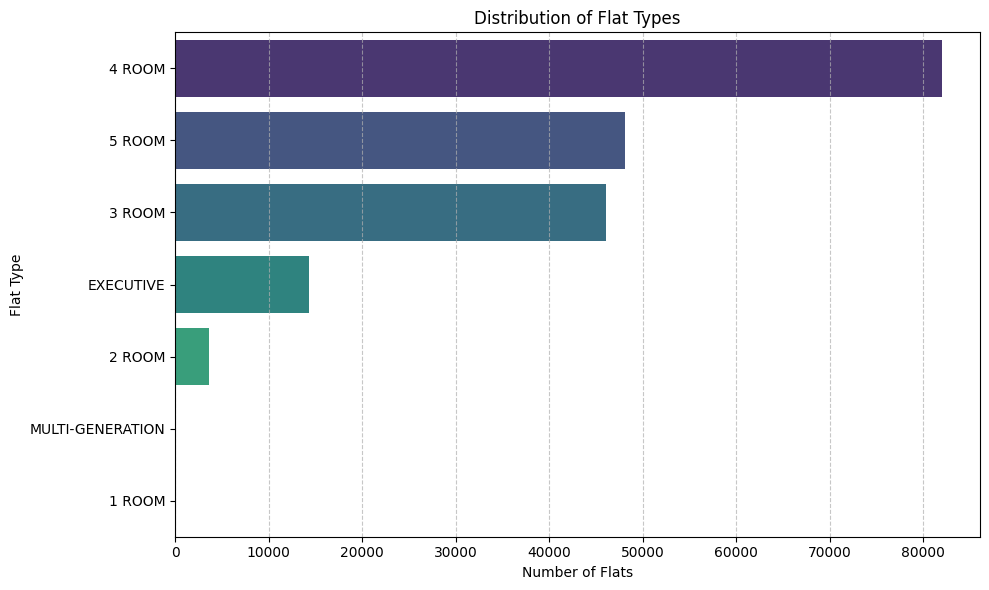

In [ ]:
print("Number of flats per flat_type:")
display(df_upd['flat_type'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y=df_upd['flat_type'], order=df_upd['flat_type'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Flat Types')
plt.xlabel('Number of Flats')
plt.ylabel('Flat Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Findings:
- Most Popular Flat Types:
  1. 4 Room (81967)
  2. 5 Room (48091)
  3. 3 Room (46071)
  4. Exec (14301)

- Most Popular Flat Size (floor_area_sqm):
  1. 93 (15507)
  2. 92 (12225)
  3. 67 (11834)
  4. 110 (8907)

> This is overall is indicative of the Supply and Demand in the Housing Market

#### How does Flat Type / Flat Model affect Pricing?

Median Resale Price Per Sqm Over Time by Flat Type
- Informs us on price trends specific to flat type over the years
- Which flat types are becoming more / less affordable

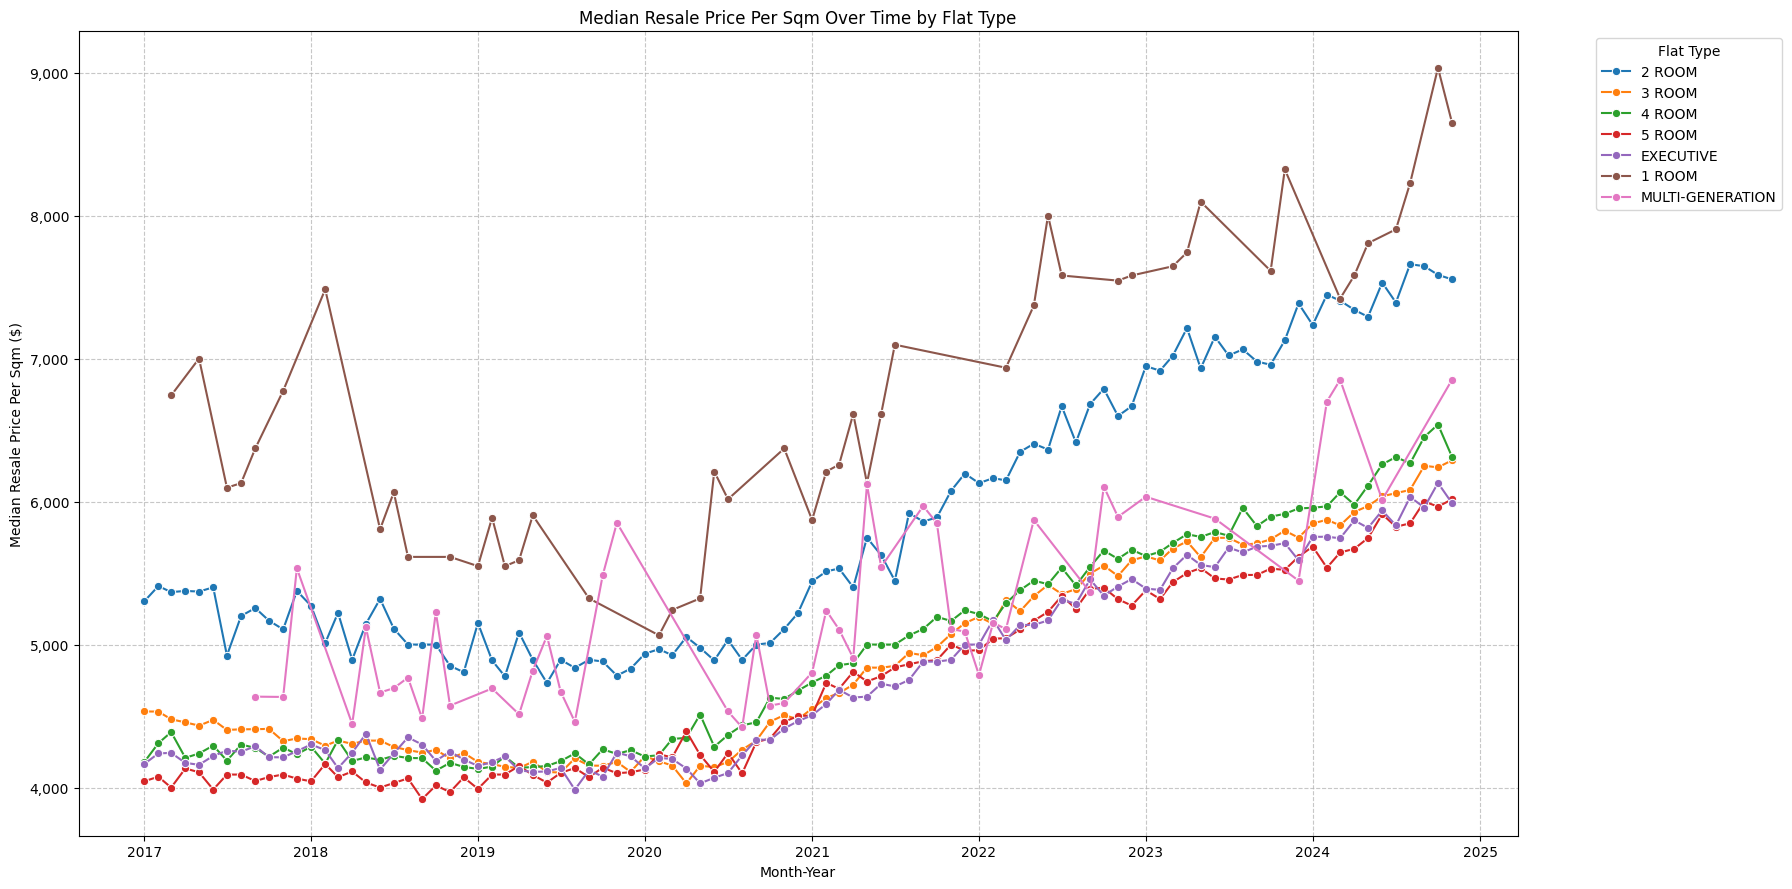

In [ ]:
# Ensure 'month' column is in datetime format
df_upd['month'] = pd.to_datetime(df_upd['month'])

# Calculate median price_per_sqm per month for each flat_type
median_price_per_sqm_by_flat_type_over_time = df_upd.groupby(['month', 'flat_type'])['price_per_sqm'].median().reset_index()

plt.figure(figsize=(18, 9))
sns.lineplot(x='month', y='price_per_sqm', hue='flat_type', data=median_price_per_sqm_by_flat_type_over_time, marker='o', palette='tab10')

plt.title('Median Resale Price Per Sqm Over Time by Flat Type')
plt.xlabel('Month-Year')
plt.ylabel('Median Resale Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Flat Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## STEP 3.3 TEMPORAL DRIVERS
- Understanding Temporal Factors, and how it affects the Housing Market
>* Flat Age
>* Location

Let's take a look at Flat Age (Remaining Lease)

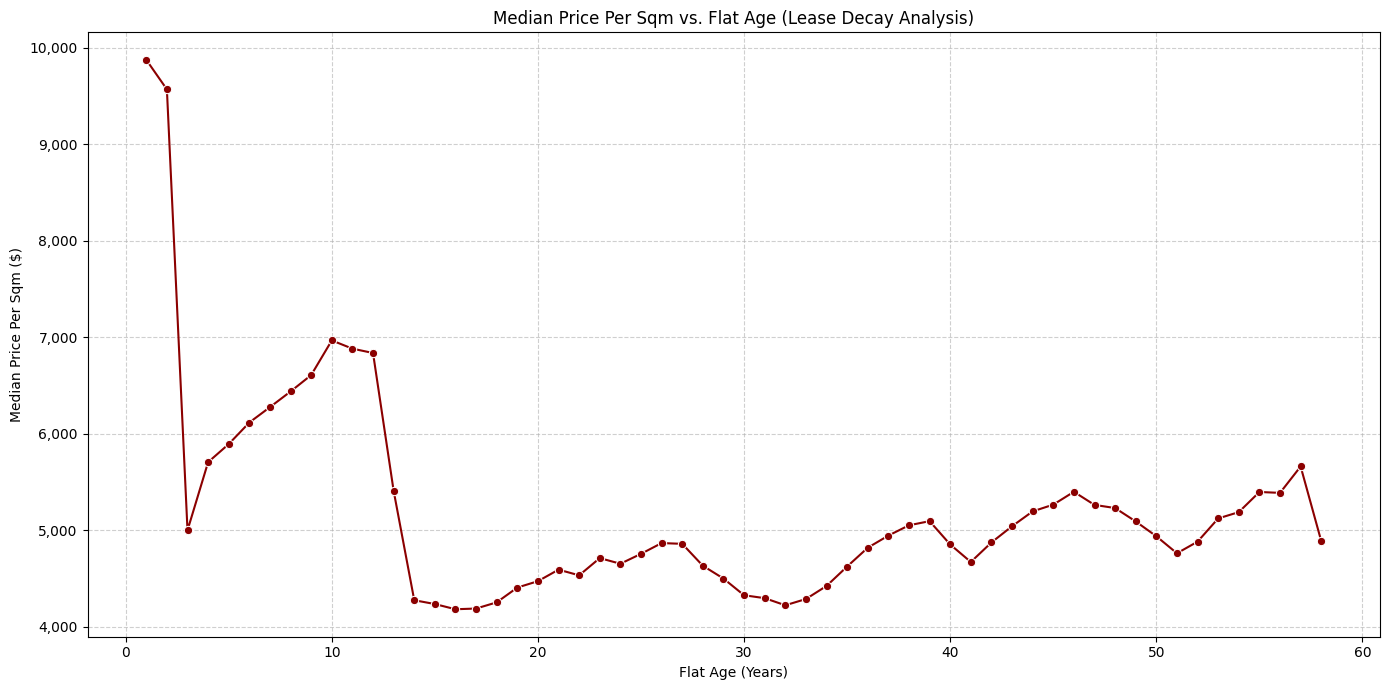

In [ ]:
# Calculate median price_per_sqm for each remaining_lease_years
lease_decay_data = df_upd.groupby('flat_age')['price_per_sqm'].median().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(x='flat_age', y='price_per_sqm', data=lease_decay_data, marker='o', color='darkred')

plt.title('Median Price Per Sqm vs. Flat Age (Lease Decay Analysis)')
plt.xlabel('Flat Age (Years)')
plt.ylabel('Median Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Comments: Add in percentage / 10 year decrease in remaining lease years

Analysing the relationship between Locational/Temporal Factors and Resale Price

In [ ]:
unique_towns = df_upd['town'].unique()
print("Unique Towns:")
for town in unique_towns:
    print(town)

Unique Towns:
ANG MO KIO
BEDOK
BISHAN
BUKIT BATOK
BUKIT MERAH
BUKIT PANJANG
BUKIT TIMAH
CENTRAL AREA
CHOA CHU KANG
CLEMENTI
GEYLANG
HOUGANG
JURONG EAST
JURONG WEST
KALLANG/WHAMPOA
MARINE PARADE
PASIR RIS
PUNGGOL
QUEENSTOWN
SEMBAWANG
SENGKANG
SERANGOON
TAMPINES
TOA PAYOH
WOODLANDS
YISHUN


Price Per Sqm Distribution by Town
- Informs us on affordability per town

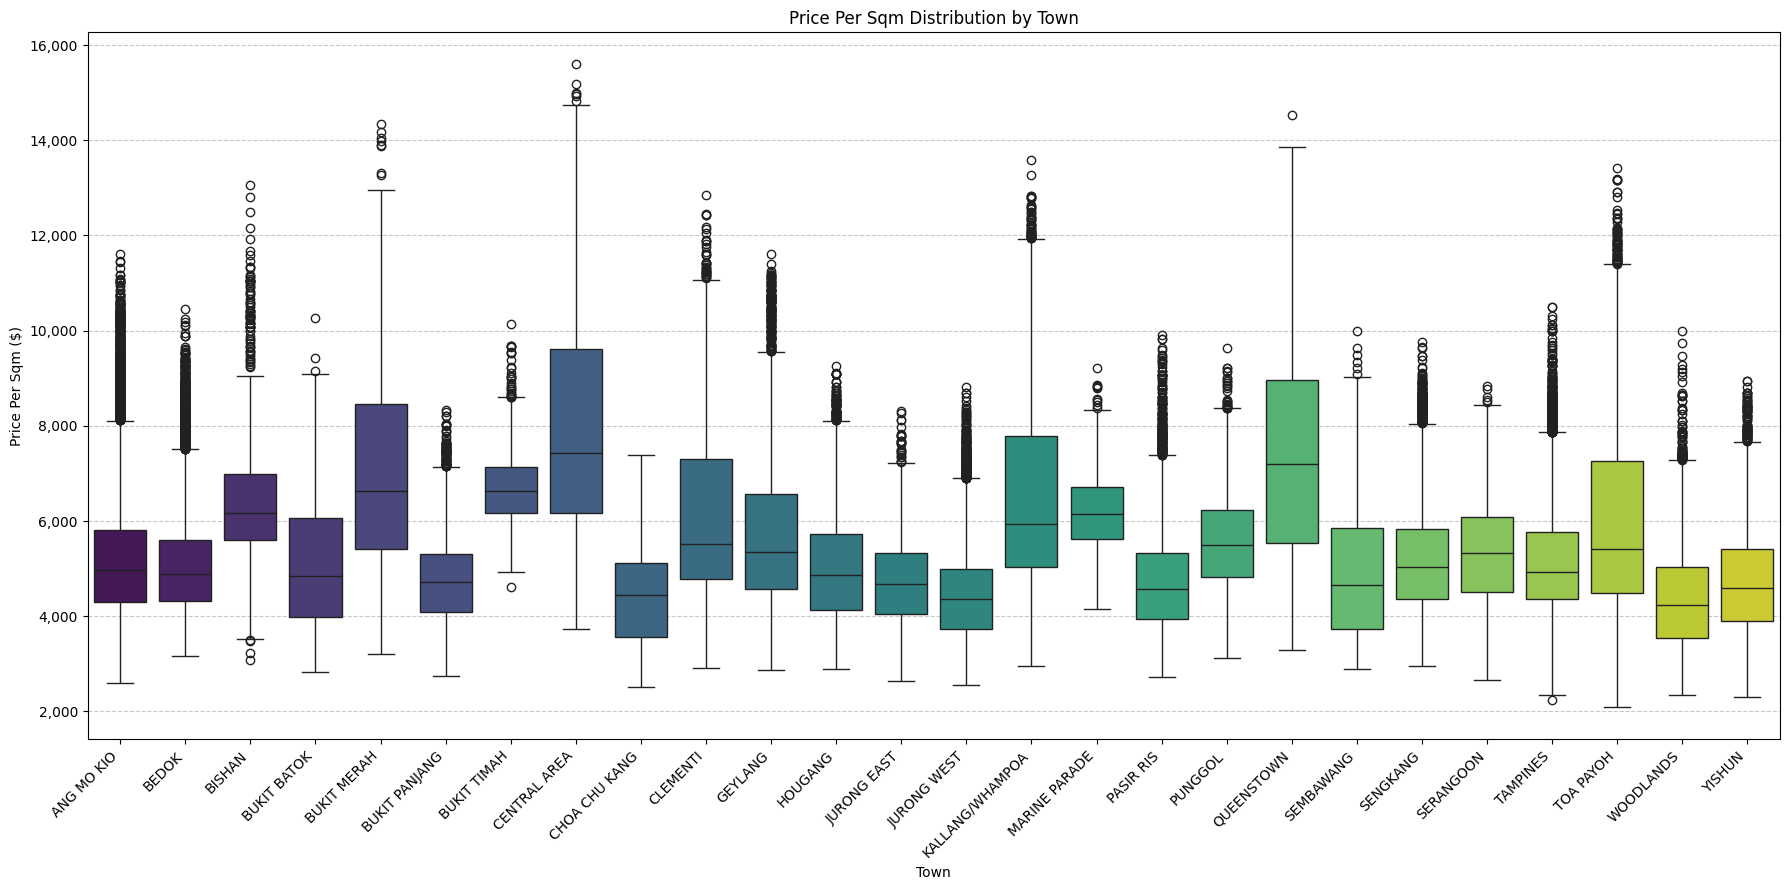

In [ ]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='town', y='price_per_sqm', data=df_upd, palette='viridis', hue='town', legend=False)
plt.title('Price Per Sqm Distribution by Town')
plt.xlabel('Town')
plt.ylabel('Price Per Sqm ($)')

# Format y-axis to display readable numbers
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribution of Flat Age by Town
- Tells us the supply of older/younger flats in each town
- Informs us on Housing Stock

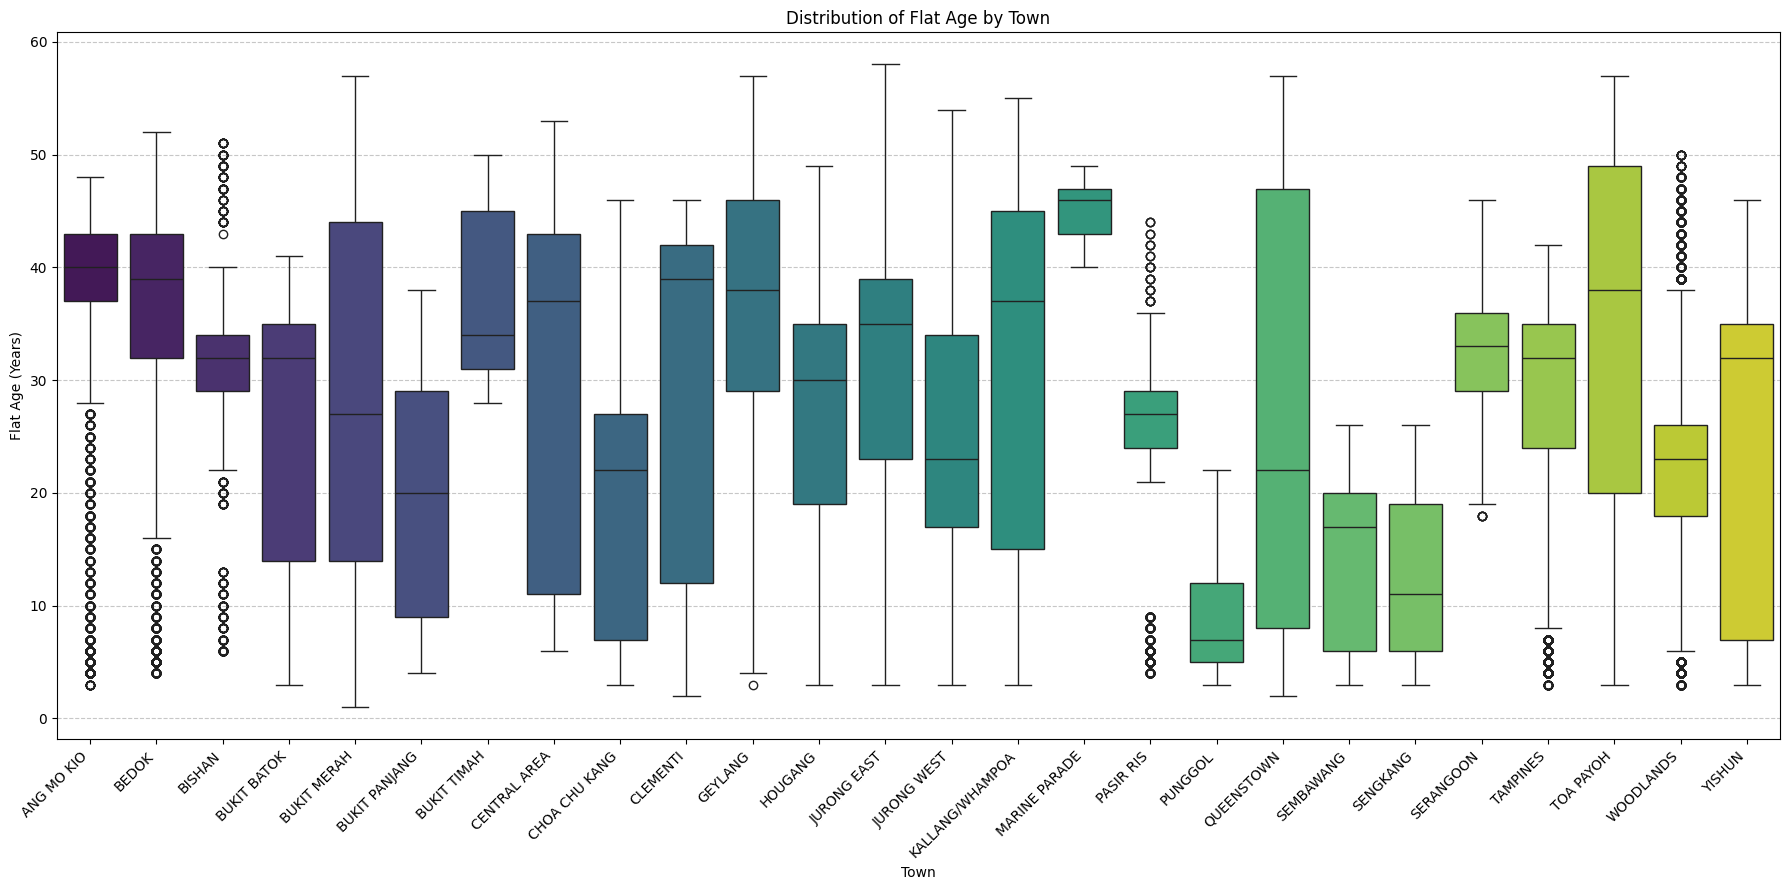

In [ ]:
plt.figure(figsize=(18, 9))
sns.boxplot(x='town', y='flat_age', data=df_upd, palette='viridis', hue='town', legend=False)
plt.title('Distribution of Flat Age by Town')
plt.xlabel('Town')
plt.ylabel('Flat Age (Years)')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Heat Map of Town x Flat Type

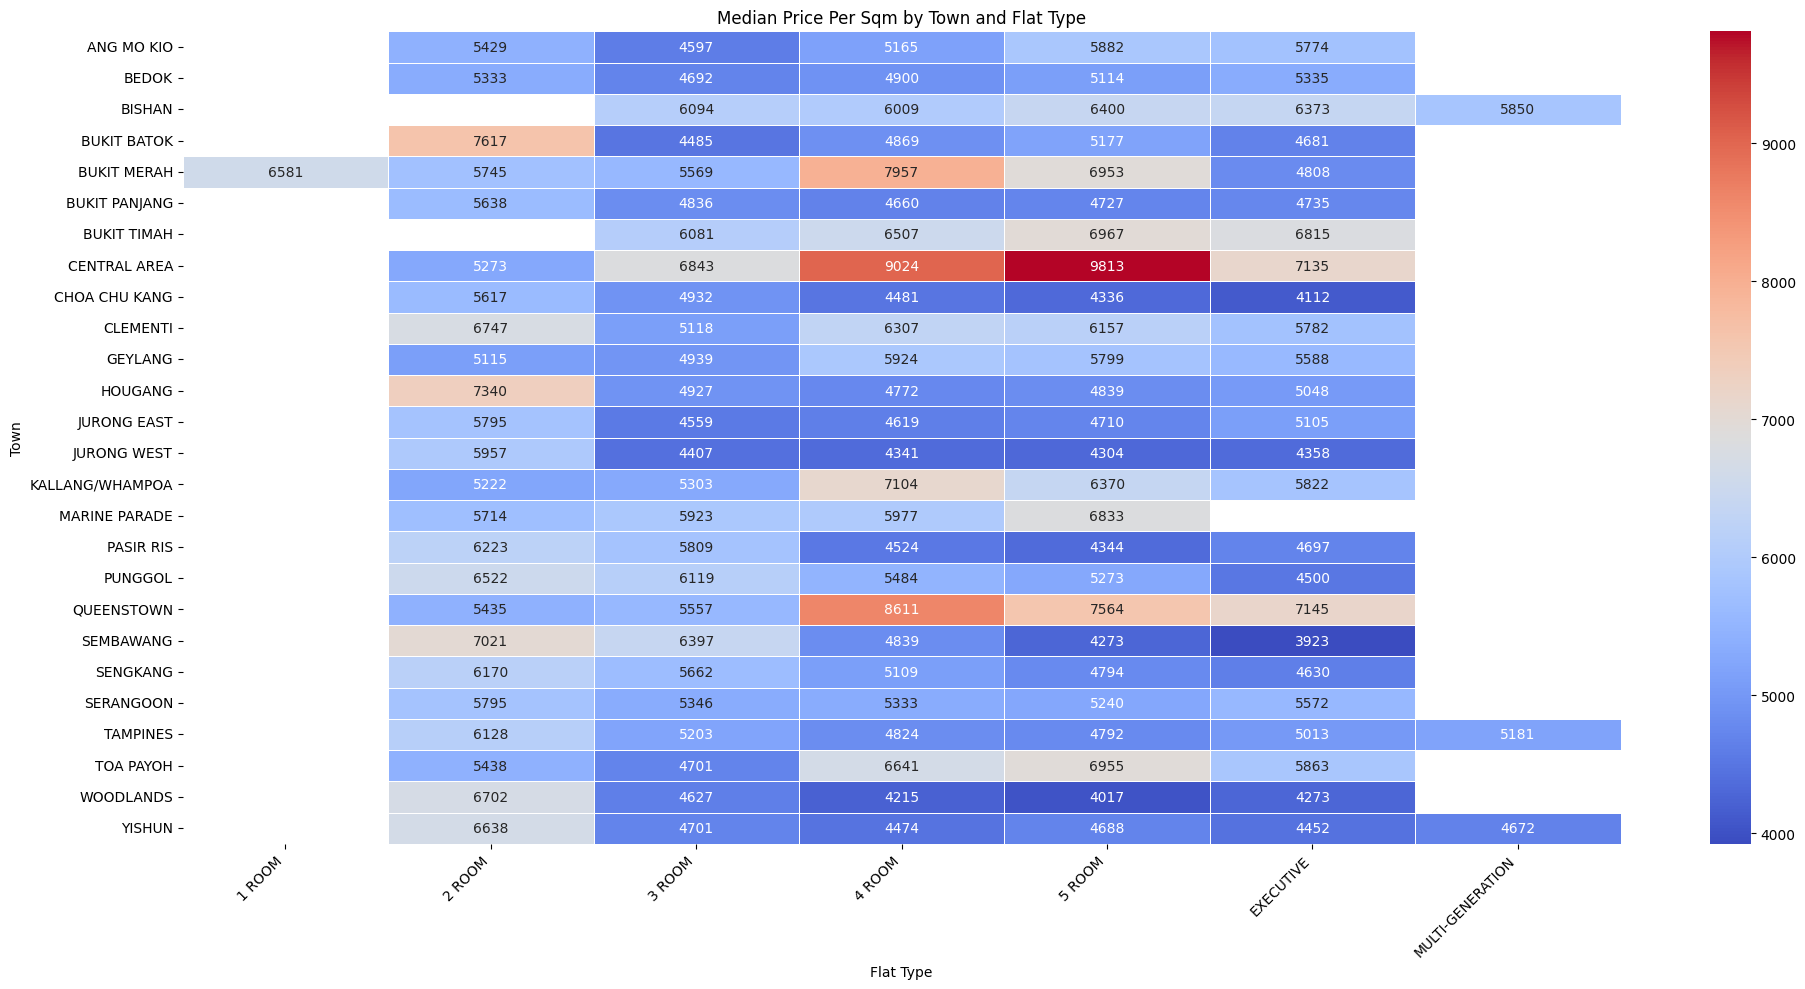

In [ ]:
# Calculate median price_per_sqm for each town and flat_type
median_price_per_sqm_pivot = df_upd.groupby(['town', 'flat_type'])['price_per_sqm'].median().unstack()

plt.figure(figsize=(20, 10)) # Adjust figure size for readability
sns.heatmap(median_price_per_sqm_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=.5)
plt.title('Median Price Per Sqm by Town and Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Town')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## STEP 4: PREPPING DATA FOR MODELLING
- Clean and Encode
- Add Essential Features
- Drop Unneccesary Features
- Check multicollinarity
- Check correlation
- Select Features for Modelling


## 4.1 Clean and Encode Data
- Categorical data into Numerical data - such as Town, Flat Type, Flat_Model , etc.

In [ ]:
df_upd.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,5272.727273,2017,38,61.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,3731.343284,2017,39,60.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,3910.447761,2017,37,62.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,3897.058824,2017,37,62.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,3955.223881,2017,37,62.0


Adding in Contextual Stats Encoding
- by Town and by Flat Type


In [ ]:
# Town-level Stats
# Calculate town-level statistics directly using the 'town' column
town_stats = (
    df_upd.groupby('town')
          .agg(
              town_median_psqm = ('price_per_sqm', 'median'),
              town_mean_psqm   = ('price_per_sqm', 'mean'),
              town_avg_lease   = ('remaining_lease_years', 'mean'),
              town_count       = ('resale_price', 'count')
          )
          .reset_index()
)

# Merge stats back into df_upd using the 'town' column
df_upd = df_upd.merge(town_stats, on='town', how='left')

In [ ]:
print("DataFrame after adding town-level statistics:")
display(df_upd.sample(5))

DataFrame after adding town-level statistics:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,flat_age,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count
23849,2018-03-01,PUNGGOL,4 ROOM,613A,PUNGGOL DR,10 TO 12,93.0,Model A,2012,425000.0,4569.892473,2018,6,93.0,5489.843414,5546.687029,89.791701,14436
165266,2023-11-01,BUKIT BATOK,3 ROOM,313,BT BATOK ST 32,10 TO 12,68.0,New Generation,1986,395000.0,5808.823529,2023,37,61.0,4840.503574,5105.296381,73.404910,7740
150849,2023-04-01,HOUGANG,5 ROOM,361,HOUGANG AVE 5,01 TO 03,123.0,Improved,1992,675888.0,5495.024390,2023,31,68.0,4868.456078,5041.150520,73.013271,9796
182213,2024-06-01,SEMBAWANG,4 ROOM,130A,CANBERRA CRES,13 TO 15,93.0,Model A,2018,688000.0,7397.849462,2024,6,93.0,4656.488550,4853.209882,84.380590,5389
19648,2017-12-01,JURONG WEST,5 ROOM,678A,JURONG WEST ST 64,13 TO 15,110.0,Premium Apartment,2008,458000.0,4163.636364,2017,9,89.0,4360.902256,4445.133913,73.784109,12863


In [ ]:
# Flat_type-level Stats
# Calculate flat-type-level statistics directly using the 'flat_type' column
flat_type_stats = (
    df_upd.groupby('flat_type')
          .agg(
              flat_type_median_psqm = ('price_per_sqm', 'median'),
              flat_type_mean_psqm   = ('price_per_sqm', 'mean'),
              flat_type_avg_lease   = ('remaining_lease_years', 'mean'),
              flat_type_count       = ('resale_price', 'count')
          )
          .reset_index()
)

# Merge stats back into df_upd using the 'flat_type' column
df_upd = df_upd.merge(flat_type_stats, on='flat_type', how='left')

In [ ]:
print("DataFrame after adding flat-type level statistics:")
display(df_upd.sample(15
                    ))

DataFrame after adding flat-type level statistics:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,flat_age,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count,flat_type_median_psqm,flat_type_mean_psqm,flat_type_avg_lease,flat_type_count
47150,2019-04-01,CHOA CHU KANG,5 ROOM,692A,CHOA CHU KANG CRES,13 TO 15,110.0,Improved,2003,376500.0,...,16,82.0,4437.500000,4415.199783,78.637448,8887,4900.00000,5139.315966,76.972926,48091
84692,2020-11-01,TAMPINES,4 ROOM,234,SIMEI ST 4,04 TO 06,104.0,Model A,1988,430000.0,...,32,66.0,4931.506849,5190.587612,70.777051,12994,5049.50495,5374.938855,77.739176,81967
128360,2022-06-01,GEYLANG,4 ROOM,104,ALJUNIED CRES,01 TO 03,92.0,New Generation,1978,428000.0,...,44,54.0,5342.173048,5745.120376,62.987222,4774,5049.50495,5374.938855,77.739176,81967
46785,2019-04-01,BISHAN,5 ROOM,190,BISHAN ST 13,04 TO 06,121.0,Improved,1987,710000.0,...,32,66.0,6178.084180,6365.166690,67.908540,3466,4900.00000,5139.315966,76.972926,48091
19422,2017-12-01,GEYLANG,3 ROOM,83,MACPHERSON LANE,01 TO 03,64.0,Standard,1968,250000.0,...,49,49.0,5342.173048,5745.120376,62.987222,4774,5000.00000,5255.275896,64.795815,46071
74281,2020-07-01,PASIR RIS,5 ROOM,577,PASIR RIS ST 53,04 TO 06,124.0,Improved,1995,555000.0,...,25,74.0,4571.428571,4749.653807,73.626165,5687,4900.00000,5139.315966,76.972926,48091
61280,2019-11-01,JURONG WEST,5 ROOM,848,JURONG WEST ST 81,01 TO 03,128.0,Improved,1996,350000.0,...,23,75.0,4360.902256,4445.133913,73.784109,12863,4900.00000,5139.315966,76.972926,48091
72728,2020-06-01,WOODLANDS,5 ROOM,738,WOODLANDS CIRCLE,04 TO 06,121.0,Improved,1998,380000.0,...,22,76.0,4239.130435,4384.335220,76.544934,13787,4900.00000,5139.315966,76.972926,48091
128937,2022-06-01,PUNGGOL,5 ROOM,116,EDGEFIELD PLAINS,13 TO 15,113.0,Premium Apartment,2003,568000.0,...,19,80.0,5489.843414,5546.687029,89.791701,14436,4900.00000,5139.315966,76.972926,48091
52804,2019-07-01,BUKIT MERAH,4 ROOM,38,JLN RUMAH TINGGI,10 TO 12,99.0,Model A,1997,640000.0,...,22,76.0,6622.222222,7015.083643,70.311769,7435,5049.50495,5374.938855,77.739176,81967


Clean-up Numerical Values
- Storey Range (take average)

In [ ]:
def convert_storey_range_to_avg(storey_range_str):
    if pd.isna(storey_range_str):
        return np.nan
    parts = storey_range_str.split(' TO ')
    if len(parts) == 2:
        try:
            lower = int(parts[0])
            upper = int(parts[1])
            return (lower + upper) / 2
        except ValueError:
            return np.nan # Handle cases where conversion to int fails
    return np.nan # Handle unexpected formats

# Apply the conversion function to create a new 'storey_avg' column
df_upd['storey_avg'] = df_upd['storey_range'].apply(convert_storey_range_to_avg)

# Display a sample of the updated DataFrame with the new 'storey_avg' column
print("DataFrame after converting 'storey_range' to 'storey_avg':")
display(df_upd[['storey_range', 'storey_avg']].sample(10))

DataFrame after converting 'storey_range' to 'storey_avg':


,storey_range,storey_avg
50777,07 TO 09,8.0
137512,04 TO 06,5.0
51519,13 TO 15,14.0
127492,07 TO 09,8.0
115237,10 TO 12,11.0
56624,01 TO 03,2.0
15288,07 TO 09,8.0
159961,01 TO 03,2.0
130217,07 TO 09,8.0
73184,07 TO 09,8.0


### Load All Numerical Columns

In [ ]:
numerical_cols_upd = df_upd.select_dtypes(include=np.number).columns
print("Numerical Columns:")
for col in numerical_cols_upd:
    print(col)

Numerical Columns:
floor_area_sqm
lease_commence_date
resale_price
price_per_sqm
trans_year
flat_age
remaining_lease_years
town_median_psqm
town_mean_psqm
town_avg_lease
town_count
flat_type_median_psqm
flat_type_mean_psqm
flat_type_avg_lease
flat_type_count
storey_avg


Check for Missing Values (in Numerical Columns)

In [ ]:
print("Missing values in numerical columns:")
print(df_upd[numerical_cols_upd].isnull().sum())

Missing values in numerical columns:
floor_area_sqm           0
lease_commence_date      0
resale_price             0
price_per_sqm            0
trans_year               0
flat_age                 0
remaining_lease_years    0
town_median_psqm         0
town_mean_psqm           0
town_avg_lease           0
town_count               0
flat_type_median_psqm    0
flat_type_mean_psqm      0
flat_type_avg_lease      0
flat_type_count          0
storey_avg               0
dtype: int64


### Round All Values to 4 d.p.

In [ ]:
# Identify numerical columns
numerical_cols = df_upd.select_dtypes(include=np.number).columns

# Round all numerical columns to 4 decimal places
df_upd[numerical_cols] = df_upd[numerical_cols].round(4)

print("DataFrame after rounding all numerical values to 4 decimal places:")
display(df_upd.head())

DataFrame after rounding all numerical values to 4 decimal places:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,remaining_lease_years,town_median_psqm,town_mean_psqm,town_avg_lease,town_count,flat_type_median_psqm,flat_type_mean_psqm,flat_type_avg_lease,flat_type_count,storey_avg
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,...,61.0,4978.2609,5332.0475,63.1322,7988,6086.9565,6212.5195,79.9057,3586,11.0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,...,60.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,2.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,...,62.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,2.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,...,62.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,5.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,...,62.0,4978.2609,5332.0475,63.1322,7988,5000.0000,5255.2759,64.7958,46071,2.0


### Check for Correlation
- Highly correlated features break regression.

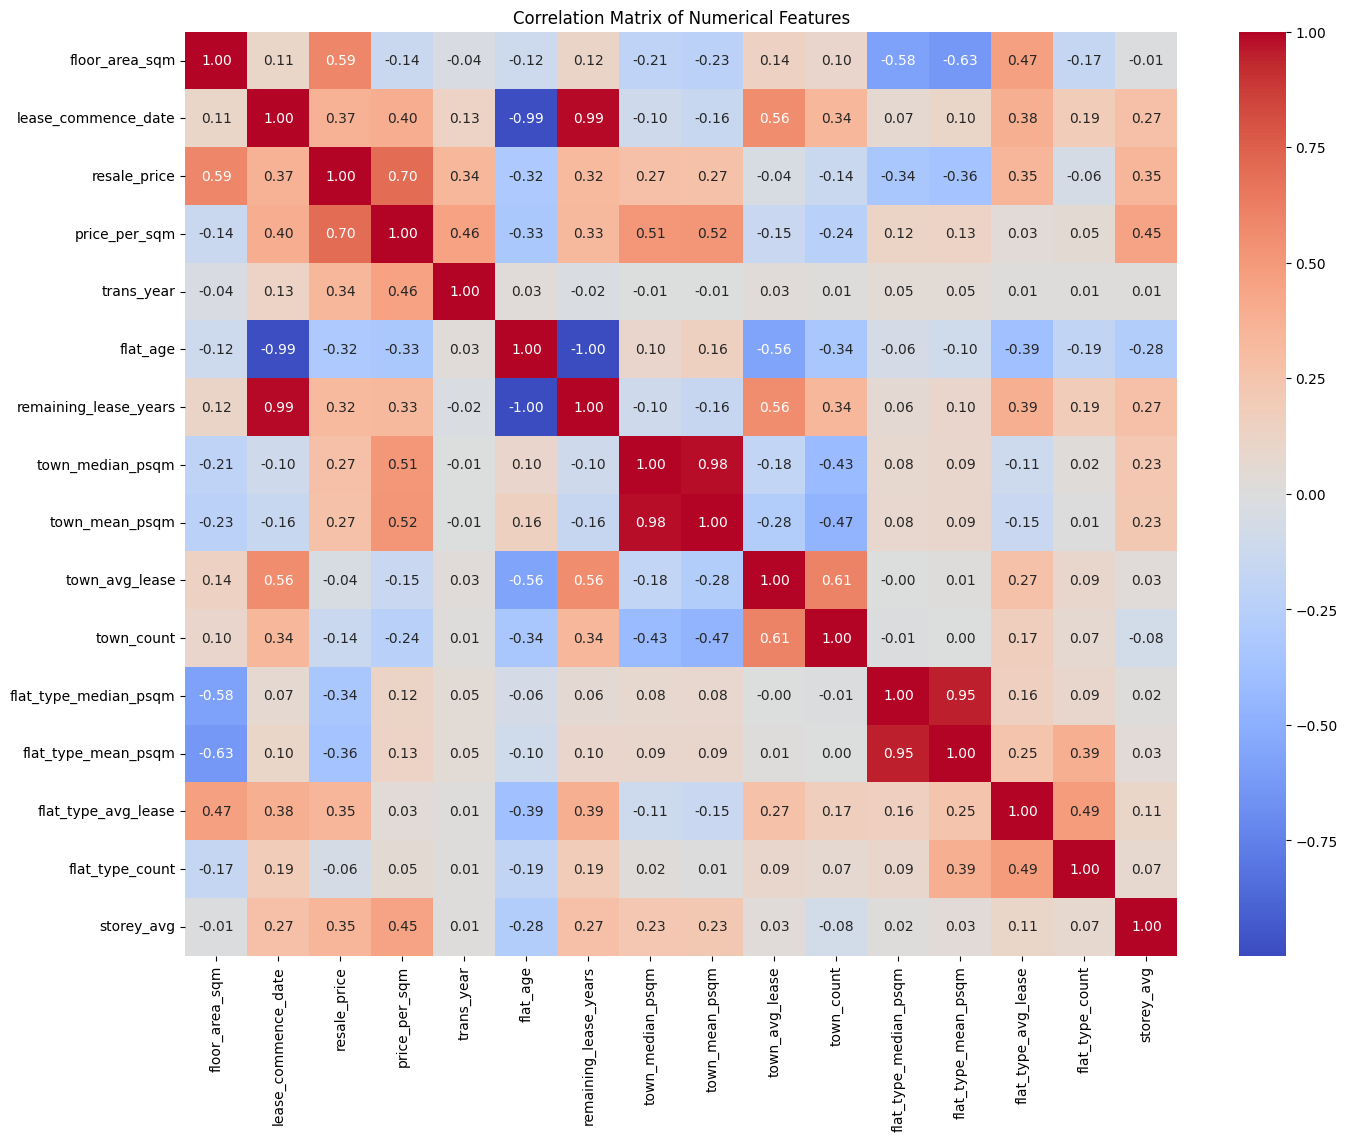

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_upd.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Findings:
- Consider dropping: lease_commence_date VS remaining_lease_years VS flat_age
- AND mean values (due to right-skewed data, mean values are not reliable)

### One Hot Encoding for Town and Flat_Type

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_town = encoder.fit_transform(df_upd[['town']])
encoded_town_df = pd.DataFrame(encoded_town, columns=encoder.get_feature_names_out(['town']), index=df_upd.index)
df_upd = pd.concat([df_upd, encoded_town_df], axis=1)
df_upd = df_upd.drop('town', axis=1)

In [ ]:
display(df_upd.sample(10))

,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
76248,2020-08-01,3 ROOM,471B,UPP SERANGOON CRES,04 TO 06,67.0,Model A,2015,355000.0,5298.5075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81496,2020-10-01,4 ROOM,12,KG ARANG RD,10 TO 12,135.0,New Generation,1982,680000.0,5037.0370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157378,2023-07-01,2 ROOM,659C,PUNGGOL EAST,01 TO 03,47.0,Model A,2018,330000.0,7021.2766,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82290,2020-10-01,3 ROOM,494E,TAMPINES ST 43,10 TO 12,67.0,Model A,2015,380000.0,5671.6418,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
102306,2021-07-01,5 ROOM,476C,UPP SERANGOON VIEW,04 TO 06,115.0,Premium Apartment,2016,730000.0,6347.8261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161133,2023-09-01,5 ROOM,426,BT BATOK WEST AVE 2,10 TO 12,120.0,Improved,1987,578000.0,4816.6667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119082,2022-01-01,5 ROOM,428B,YISHUN AVE 11,07 TO 09,112.0,Improved,2015,552000.0,4928.5714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
182032,2024-06-01,4 ROOM,671A,EDGEFIELD PLAINS,13 TO 15,90.0,Model A,2015,620000.0,6888.8889,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193841,2024-11-01,5 ROOM,311C,ANCHORVALE LANE,04 TO 06,111.0,Premium Apartment,2002,600888.0,5413.4054,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
145934,2023-01-01,5 ROOM,272,YISHUN ST 22,04 TO 06,122.0,Improved,1987,495000.0,4057.3770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Flat_Type

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_flat_type = encoder.fit_transform(df_upd[['flat_type']])
encoded_flat_type_df = pd.DataFrame(encoded_flat_type, columns=encoder.get_feature_names_out(['flat_type']), index=df_upd.index)
df_upd = pd.concat([df_upd, encoded_flat_type_df], axis=1)
df_upd = df_upd.drop('flat_type', axis=1)


In [ ]:
print("DataFrame after one-hot encoding 'flat_type' column:")
display(df_upd.sample(14))

DataFrame after one-hot encoding 'flat_type' column:


,month,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,...,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,flat_type_1 ROOM,flat_type_2 ROOM,flat_type_3 ROOM,flat_type_4 ROOM,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION
96947,2021-04-01,366,YISHUN RING RD,10 TO 12,104.0,Model A,1988,420000.0,4038.4615,2021,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9146,2017-06-01,469A,ADMIRALTY DR,13 TO 15,142.0,Premium Apartment,2001,445000.0,3133.8028,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55341,2019-08-01,183C,BOON LAY AVE,04 TO 06,92.0,Model A,2015,395000.0,4293.4783,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
130154,2022-07-01,290C,BT BATOK EAST AVE 3,07 TO 09,142.0,Apartment,1997,800000.0,5633.8028,2022,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
153267,2023-05-01,82,WHAMPOA DR,13 TO 15,66.0,Improved,1974,320888.0,4861.9394,2023,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
89216,2021-01-01,89,DAWSON RD,37 TO 39,87.0,Premium Apartment,2016,861888.0,9906.7586,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
51964,2019-06-01,243,SERANGOON AVE 2,10 TO 12,84.0,Simplified,1985,505000.0,6011.9048,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
68915,2020-03-01,303D,PUNGGOL PL,04 TO 06,93.0,Premium Apartment,2011,440000.0,4731.1828,2020,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
86263,2020-12-01,40,JLN BAHAGIA,01 TO 03,91.0,Terrace,1972,775000.0,8516.4835,2020,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
134914,2022-09-01,34,KIM CHENG ST,01 TO 03,88.0,Standard,1973,742888.0,8441.9091,2022,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# POSTAL CODE / LOCATIONAL DATA FROM APIs

## Step 5: Cleaning Data to calculate distance from unit to mrt

In [ ]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

#### 5.1 standardizing block and street name

In [ ]:
def standardize_address_column(series):
    """Applies common cleaning and standardization to a string series."""
    # 1. Convert to string and handle NaN
    series = series.astype(str).fillna('')
    # 2. Convert to uppercase
    series = series.str.upper()
    # 3. Remove leading/trailing spaces
    series = series.str.strip()
    # 4. Collapse internal multiple spaces to a single space
    series = series.str.replace(r'\s+', ' ', regex=True)
    return series

# Apply the function to the block and street_name columns
df['block'] = standardize_address_column(df['block'])
df['street_name'] = standardize_address_column(df['street_name'])

print("Address columns have been standardized.")
df.head()

Address columns have been standardized.


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


#### 5.2 Create new unique address column combining street name and block

In [ ]:
# Create the full address by concatenating the block and street name
df['full_address'] = (df['block'] + ' ' + df['street_name']).str.strip()

# Filter out rows where the address is empty (e.g., if both block/street were 'NAN')
df = df[df['full_address'].astype(bool)].copy()

# Extract the list of unique addresses for efficient API calls
unique_addresses_list = df['full_address'].unique().tolist()

print(f"✅ Created 'full_address' column.")
print(f"   Total unique addresses for API to call: {len(unique_addresses_list)}")
df[['block', 'street_name', 'full_address']].head()

✅ Created 'full_address' column.
   Total unique addresses for API to call: 9598


,block,street_name,full_address
0,406,ANG MO KIO AVE 10,406 ANG MO KIO AVE 10
1,108,ANG MO KIO AVE 4,108 ANG MO KIO AVE 4
2,602,ANG MO KIO AVE 5,602 ANG MO KIO AVE 5
3,465,ANG MO KIO AVE 10,465 ANG MO KIO AVE 10
4,601,ANG MO KIO AVE 5,601 ANG MO KIO AVE 5


In [ ]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5


#### 5.3 Geocoding Merge (2 addresses not found)

In [ ]:
import pandas as pd

In [ ]:
import requests
import time

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
geocoded_results = {}
total_requests = len(unique_addresses_list)

print("\n--- Starting Rate-Limited Geocoding ---")

for i, address in enumerate(unique_addresses_list):
    params = {
        'searchVal': address,
        'returnGeom': 'Y',        # Request coordinates
        'getAddrDetails': 'Y'     # Request postal code
    }

    try:
        response = requests.get(ONEMAP_API_URL, params=params, timeout=15)
        response.raise_for_status()
        data = response.json()

        if data.get('found', 0) > 0 and data['results']:
            result = data['results'][0]
            geocoded_results[address] = {
                'latitude': float(result.get('LATITUDE')),
                'longitude': float(result.get('LONGITUDE')),
                'postal_code': result.get('POSTAL'),
            }
        else:
            geocoded_results[address] = {'latitude': np.nan, 'longitude': np.nan, 'postal_code': np.nan}

    except requests.exceptions.RequestException as e:
        # Log errors but continue processing
        print(f"Error for {address} (Request failed): {e}")
        geocoded_results[address] = {'latitude': np.nan, 'longitude': np.nan, 'postal_code': np.nan}

    # Rate Limiting: Pause for 1 second every 100 requests
    if (i + 1) % 100 == 0:
        time.sleep(1)
        print(f"    Processed {i+1}/{total_requests} addresses. Pausing 1 second...")

print("\n--- Geocoding Complete. Merging Results ---")

# Merge the new data back into the original DataFrame
results_df = pd.DataFrame.from_dict(geocoded_results, orient='index').reset_index().rename(columns={'index': 'full_address'})
df = pd.merge(df, results_df, on='full_address', how='left')


--- Starting Rate-Limited Geocoding ---
    Processed 100/9598 addresses. Pausing 1 second...


KeyboardInterrupt: 

In [ ]:
import requests # Need to ensure this is available for Step 2

# Assuming 'geocoded_results' dictionary still exists from the previous run

print("\n--- 1. Identifying Failed Addresses for Retry ---")

# 1. Initialize a list to hold the addresses that need to be re-queried
addresses_to_retry = []

# 2. Iterate through the results to find addresses with NaN coordinates
for address, data in geocoded_results.items():
    # pd.isna() checks safely for np.nan values
    if pd.isna(data['latitude']):
        addresses_to_retry.append(address)

print(f"Found {len(addresses_to_retry)} addresses that failed or were not found.")

# Set the increased timeout (20 seconds)
RETRY_TIMEOUT = 20
print(f"Set retry timeout to {RETRY_TIMEOUT} seconds.")

In [ ]:
# --- Retry failed addresses with higher timeout and retries ---
import time

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
RETRY_TIMEOUT = 20  # per request
MAX_RETRIES = 3
BACKOFF_BASE = 2

if not addresses_to_retry:
    print("No addresses to retry.")
else:
    print(f"Retrying {len(addresses_to_retry)} addresses with timeout={RETRY_TIMEOUT}s ...")

    for addr in addresses_to_retry:
        params = {"searchVal": addr, "returnGeom": "Y", "getAddrDetails": "Y"}
        success = False
        for attempt in range(1, MAX_RETRIES + 1):
            try:
                resp = requests.get(ONEMAP_API_URL, params=params, timeout=RETRY_TIMEOUT)
                resp.raise_for_status()
                data = resp.json()
                if data.get("found", 0) > 0 and data["results"]:
                    res = data["results"][0]
                    geocoded_results[addr] = {
                        "latitude": float(res.get("LATITUDE")),
                        "longitude": float(res.get("LONGITUDE")),
                        "postal_code": res.get("POSTAL"),
                    }
                else:
                    geocoded_results[addr] = {"latitude": np.nan, "longitude": np.nan, "postal_code": np.nan}
                success = True
                break
            except requests.exceptions.Timeout as e:
                if attempt < MAX_RETRIES:
                    wait = BACKOFF_BASE ** (attempt - 1)
                    print(f"Timeout for {addr}; retrying in {wait}s ({attempt}/{MAX_RETRIES})")
                    time.sleep(wait)
                else:
                    print(f"Timeout for {addr} after {MAX_RETRIES} tries: {e}")
            except requests.exceptions.RequestException as e:
                print(f"Error for {addr} on retry: {e}")
                break
        if not success:
            geocoded_results[addr] = {"latitude": np.nan, "longitude": np.nan, "postal_code": np.nan}

    # Refresh merged results in df
    results_df = (
        pd.DataFrame.from_dict(geocoded_results, orient="index")
        .reset_index()
        .rename(columns={"index": "full_address"})
    )
    df = pd.merge(df.drop(columns=["latitude", "longitude", "postal_code"], errors="ignore"),
                  results_df, on="full_address", how="left")

    print("Retry complete; df updated with retried coordinates/postal codes.")


Test for Successful Geo-coding after Re-trial


In [ ]:
# --- Validate geocoding completeness ---
# Count NaNs in coordinates
nan_lat = df["latitude"].isna().sum()
nan_lon = df["longitude"].isna().sum()
total = len(df)

print(f"Total flats: {total}")
print(f"Rows missing latitude: {nan_lat}")
print(f"Rows missing longitude: {nan_lon}")

# List any addresses still missing coords
missing_coords = df[df["latitude"].isna() | df["longitude"].isna()][["full_address", "postal_code"]]
if missing_coords.empty:
    print("✅ All addresses have coordinates.")
else:
    print("⚠️ Addresses still missing coordinates:")
    display(missing_coords.head(20))  # adjust/omit display if not in notebook


#### 5.5 Merging of geo_coded results into main df

In [ ]:
results_df = pd.DataFrame.from_dict(geocoded_results, orient='index').reset_index().rename(columns={'index': 'full_address'})

# 1. Drop old (potentially partial/stale) coordinate columns if they exist
# This ensures a clean merge. 'errors=ignore' prevents the code from failing if they don't exist.
df = df.drop(columns=['latitude', 'longitude', 'postal_code'], errors='ignore')

# 2. Merge the final results back using the 'full_address' key
df = pd.merge(df, results_df, on='full_address', how='left')

print("✅ Final Geocoding results merged successfully.")
df[['full_address', 'postal_code', 'latitude', 'longitude']].sample(10)

In [ ]:
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5


#### 5.6 Install kaggle hub and mrt coordinate dataset

In [ ]:
df = pd.read_csv('mydata.csv')

In [ ]:
pip install kagglehub


In [ ]:
import os
import kagglehub

# --- Step 1: Download ---
# Download latest version (assuming this returns the directory path)
path = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")

print("Path to dataset files:", path)
# Example path output: /home/user/.cache/kagglehub/datasets/yxlee245/singapore-train-station-coordinates/datav1

# Assuming the CSV is directly inside the downloaded folder.
# You may need to inspect the directory contents to find the exact file name.
file_name = "singapore-train-station-coordinates.csv" # Common convention
csv_path = os.path.join(path, file_name)

print(f"Attempting to load: {csv_path}")

Using Colab cache for faster access to the 'singapore-train-station-coordinates' dataset.
Path to dataset files: /kaggle/input/singapore-train-station-coordinates
Attempting to load: /kaggle/input/singapore-train-station-coordinates/singapore-train-station-coordinates.csv


In [ ]:
import pandas as pd

import kagglehub
from pathlib import Path
import glob # Used to find files within subdirectories

# --- 1. Download the Dataset from Kaggle Hub ---
print("--- 1. Downloading MRT and LRT Coordinates from Kaggle ---")

# This downloads the dataset and returns the local directory path (e.g., .../singapore-train-station-coordinates)
path_str = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")
root_path = Path(path_str)

# NEW: Use glob to search recursively for the CSV file, regardless of the 'versions/1/' folder structure.
csv_files = list(root_path.glob('**/*.csv'))

if not csv_files:
    raise FileNotFoundError(f"Could not find any CSV files in the downloaded folder or its subdirectories: {root_path}")

# Select the first found CSV file (should be the only one)
csv_path = csv_files[0]

print(f"✅ Download complete. Correct CSV path found at: {csv_path}")

# --- 2. Load the CSV into a DataFrame ---
print("--- 2. Loading MRT Coordinates CSV into DataFrame ---")
mrt_df = pd.read_csv(csv_path)
print("\n✅ CSV loaded successfully. Here are the first few rows:")
display(mrt_df.sample(10))
print(f"Number of Stations Identified: {len(mrt_df)}")




--- 1. Downloading MRT and LRT Coordinates from Kaggle ---
Using Colab cache for faster access to the 'singapore-train-station-coordinates' dataset.
✅ Download complete. Correct CSV path found at: /kaggle/input/singapore-train-station-coordinates/mrt_lrt_data.csv
--- 2. Loading MRT Coordinates CSV into DataFrame ---

✅ CSV loaded successfully. Here are the first few rows:


,station_name,type,lat,lng
152,Punggol Point,LRT,1.416932,103.906680
63,Boon Keng,MRT,1.320091,103.861655
52,Tanah Merah,MRT,1.327309,103.946479
126,Fajar,LRT,1.384502,103.770862
89,Kent Ridge,MRT,1.293629,103.784441
15,Braddell,MRT,1.340550,103.847098
62,Farrer Park,MRT,1.312679,103.854872
18,Newton,MRT,1.313830,103.838021
155,Sumang,LRT,1.408501,103.898605
140,Layar,LRT,1.392141,103.880022


Number of Stations Identified: 157


In [ ]:
mrt_df.columns

In [ ]:
mrt_df = mrt_df.rename(columns={'lat': 'mrt_lat', 'lng': 'mrt_lng'})

In [ ]:
mrt_df.sample(5)

,station_name,type,mrt_lat,mrt_lng
22,City Hall,MRT,1.293119,103.852089
105,Telok Ayer,MRT,1.282285,103.848584
84,Caldecott,MRT,1.337649,103.839627
132,Bakau,LRT,1.388040,103.905412
5,Kranji,MRT,1.425302,103.762049


# 5.7 TESTING

In [ ]:
df.sample(10)

In [ ]:
pip install scipy

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import haversine_distances  # pip install scikit-learn if needed

R = 6371  # km

# Assume df_housing has columns ['lat', 'lon'] and df_mrt has ['mrt_lat', 'mrt_lon', 'station_name']
# Drop rows with missing coords
housing = df.dropna(subset=['latitude', 'longitude']).copy()
mrt = mrt_df.dropna(subset=['mrt_lat', 'mrt_lng']).copy()

# Convert to radians
housing_rad = np.radians(housing[['latitude', 'longitude']].values)
mrt_rad = np.radians(mrt[['mrt_lat', 'mrt_lng']].values)

# Distance matrix (housing x MRT)
dist_km = R * haversine_distances(housing_rad, mrt_rad)

# Nearest MRT index and distance per housing row
nearest_idx = dist_km.argmin(axis=1)
nearest_dist = dist_km[np.arange(len(housing)), nearest_idx]

# Attach results
housing['nearest_mrt_idx'] = nearest_idx
housing['distance_to_nearest_mrt_km'] = nearest_dist

# Pull MRT columns to merge
mrt_reset = mrt.reset_index(drop=True)
housing['nearest_mrt_name'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'station_name'].values
housing['nearest_mrt_lat'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'mrt_lat'].values
housing['nearest_mrt_lng'] = mrt_reset.loc[housing['nearest_mrt_idx'], 'mrt_lng'].values

# Merge back into df_housing on index
df_housing = df.merge(
    housing[['distance_to_nearest_mrt_km', 'nearest_mrt_name', 'nearest_mrt_lat', 'nearest_mrt_lng']],
    left_index=True, right_index=True, how='left'
)

print("Done. Mean distance:", housing['distance_to_nearest_mrt_km'].mean())
print(df_housing[['latitude', 'longitude', 'nearest_mrt_name', 'distance_to_nearest_mrt_km']].head())


Done. Mean distance: 0.6651909121245679
   latitude   longitude nearest_mrt_name  distance_to_nearest_mrt_km
0  1.362005  103.853880       Ang Mo Kio                    1.011433
1  1.370966  103.838202       Ang Mo Kio                    1.270031
2  1.380709  103.835368     Yio Chu Kang                    1.068607
3  1.366201  103.857201       Ang Mo Kio                    0.947097
4  1.381041  103.835132     Yio Chu Kang                    1.091392


In [ ]:
display(df_housing.sample(5))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,latitude,longitude,postal_code,distance_to_nearest_mrt_km,nearest_mrt_name,nearest_mrt_lat,nearest_mrt_lng
186709,2024-08,CHOA CHU KANG,5 ROOM,683C,CHOA CHU KANG CRES,04 TO 06,110.0,Improved,2002,77 years 01 month,530000.0,683C CHOA CHU KANG CRES,1.404679,103.746315,683683,0.822277,Yew Tee,1.397383,103.747523
119992,2022-02,KALLANG/WHAMPOA,3 ROOM,5,JLN BATU,07 TO 09,60.0,Standard,1969,45 years 11 months,330000.0,5 JLN BATU,1.391526,103.757267,679530,0.970825,Jelapang,1.386703,103.764547
156586,2023-07,BUKIT BATOK,4 ROOM,417,BT BATOK WEST AVE 4,07 TO 09,103.0,Model A,1986,62 years 01 month,498000.0,417 BT BATOK WEST AVE 4,1.362891,103.746539,650417,0.730285,Bukit Gombak,1.359043,103.751863
153937,2023-05,TAMPINES,3 ROOM,105,TAMPINES ST 11,04 TO 06,79.0,Model A,1982,58 years 07 months,425000.0,105 TAMPINES ST 11,1.348093,103.947178,521105,0.828087,Tampines,1.354467,103.943325
106978,2021-09,BUKIT BATOK,4 ROOM,114,BT BATOK WEST AVE 6,04 TO 06,104.0,Model A,1984,62 years,455000.0,114 BT BATOK WEST AVE 6,1.348837,103.746022,650114,0.398175,Bukit Batok,1.349069,103.749596


# 5.8 NEXT STEPS: SCHOOLS?

In [ ]:
import pandas as pd

In [ ]:
schools_df = pd.read_csv('moe_os_schooldata.csv')

In [ ]:
schools_df.sample(5)

,school_name,url_address,address,postal_code,telephone_no,telephone_no_2,fax_no,fax_no_2,email_address,mrt_desc,...,nature_code,session_code,mainlevel_code,sap_ind,autonomous_ind,gifted_ind,ip_ind,mothertongue1_code,mothertongue2_code,mothertongue3_code
255,SINGAPORE CHINESE GIRLS' SCHOOL,http://www.scgs.moe.edu.sg,190 DUNEARN ROAD,309437,62527966,na,62523076,na,SCGSS@MOE.EDU.SG,STEVENS MRT,...,GIRLS' SCHOOL,SINGLE SESSION,SECONDARY (S1-S4),No,No,No,Yes,CHINESE,MALAY,TAMIL
291,TEMASEK PRIMARY SCHOOL,http://www.temasekpri.moe.edu.sg,501 BEDOK SOUTH AVE 3,469300,64438134,na,64495871,na,TEMASEK_PS@MOE.EDU.SG,Tanah Merah MRT,...,CO-ED SCHOOL,SINGLE SESSION,PRIMARY,No,No,No,No,CHINESE,MALAY,TAMIL
126,HONG WEN SCHOOL,http://www.hongwen.moe.edu.sg,30 TOWNER ROAD,327829,62943340,na,62937625,na,HWS@MOE.EDU.SG,Boon Keng MRT,...,CO-ED SCHOOL,SINGLE SESSION,PRIMARY,Yes,No,No,No,CHINESE,na,na
175,NAN HUA PRIMARY SCHOOL,http://www.nanhuapri.moe.edu.sg,30 Jalan Lempeng,128806,67788050,na,67784127,na,NHPS@MOE.EDU.SG,Clementi MRT Station,...,CO-ED SCHOOL,SINGLE SESSION,PRIMARY,Yes,No,Yes,No,CHINESE,na,na
190,NORTHBROOKS SECONDARY SCHOOL,http://www.northbrookssec.moe.edu.sg,585 YISHUN RING ROAD,768692,67524311,na,67566110,na,NORTHBROOKS@MOE.EDU.SG,"YISHUN MRT, KHATIB MRT",...,CO-ED SCHOOL,SINGLE SESSION,SECONDARY (S1-S5),No,No,No,No,CHINESE,MALAY,TAMIL


In [ ]:
schools_df.columns

Index(['school_name', 'url_address', 'address', 'postal_code', 'telephone_no',
       'telephone_no_2', 'fax_no', 'fax_no_2', 'email_address', 'mrt_desc',
       'bus_desc', 'principal_name', 'first_vp_name', 'second_vp_name',
       'third_vp_name', 'fourth_vp_name', 'fifth_vp_name', 'sixth_vp_name',
       'dgp_code', 'zone_code', 'type_code', 'nature_code', 'session_code',
       'mainlevel_code', 'sap_ind', 'autonomous_ind', 'gifted_ind', 'ip_ind',
       'mothertongue1_code', 'mothertongue2_code', 'mothertongue3_code'],
      dtype='object')

In [ ]:
schools_df.drop(columns=['url_address','telephone_no',
       'telephone_no_2', 'fax_no', 'fax_no_2', 'email_address','principal_name', 'first_vp_name', 'second_vp_name',
       'third_vp_name', 'fourth_vp_name', 'fifth_vp_name', 'sixth_vp_name','dgp_code', 'zone_code', 'type_code', 'nature_code', 'session_code',
       'mainlevel_code', 'sap_ind', 'autonomous_ind', 'gifted_ind', 'ip_ind',
       'mothertongue1_code', 'mothertongue2_code', 'mothertongue3_code'], inplace=True)

In [ ]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   school_name  337 non-null    object
 1   address      337 non-null    object
 2   postal_code  337 non-null    int64 
 3   mrt_desc     337 non-null    object
 4   bus_desc     337 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.3+ KB


In [ ]:
schools_df.sample(5)

,school_name,address,postal_code,mrt_desc,bus_desc
144,JUYING SECONDARY SCHOOL,33 JURONG WEST STREET 91,649038,"BOON LAY MRT, PIONEER MRT, JOO KOON MRT","99, 241"
110,GAN ENG SENG SCHOOL,1 HENDERSON ROAD,159561,"REDHILL MRT, TIONG BAHRU MRT","14, 16, 32, 33, 51, 63, 64, 120, 122, 145, 139..."
41,BUKIT VIEW SECONDARY SCHOOL,16 BUKIT BATOK STREET 21,659633,BUKIT BATOK MRT,"61, 66, 77, 106, 157, 173, 174, 178, 189, 506,..."
285,TANJONG KATONG SECONDARY SCHOOL,130 HAIG ROAD,438796,"PAYA LEBAR MRT, DAKOTA MRT","10, 16, 31, 32, 33, 40, 76, 135, 197"
128,HOUGANG PRIMARY SCHOOL,1 HOUGANG ST 93,534238,"Ang Mo Kio, Buangkok, Hougang, Sengkang, Yio C...","SBS 43, 72, 88, 101, 109, 116, 156, 159, 325, 329"


In [ ]:
# --- Schools proximity + nearest (index-accurate merge) ---
import requests, time, numpy as np, pandas as pd

ONEMAP_API_URL = "https://www.onemap.gov.sg/api/common/elastic/search"
REQUEST_TIMEOUT = 20
MAX_RETRIES = 3
BACKOFF_BASE = 2

# 1) Geocode schools from MOE CSV (skip if you already have `schools` with lat/lon)
schools_raw = pd.read_csv("moe_os_schooldata.csv")
schools_raw["school_address"] = (
    schools_raw["address"].fillna("") + " Singapore " + schools_raw["postal_code"].astype(str).str.zfill(6)
)
unique_schools = schools_raw[["school_name", "school_address"]].drop_duplicates()

school_coords = {}
for _, row in unique_schools.iterrows():
    addr = row["school_address"]
    params = {"searchVal": addr, "returnGeom": "Y", "getAddrDetails": "Y"}
    success = False
    for attempt in range(1, MAX_RETRIES + 1):
        try:
            resp = requests.get(ONEMAP_API_URL, params=params, timeout=REQUEST_TIMEOUT)
            resp.raise_for_status()
            data = resp.json()
            if data.get("found", 0) > 0 and data["results"]:
                res = data["results"][0]
                school_coords[addr] = {"latitude": float(res.get("LATITUDE")), "longitude": float(res.get("LONGITUDE"))}
            else:
                school_coords[addr] = {"latitude": np.nan, "longitude": np.nan}
            success = True
            break
        except requests.exceptions.Timeout as e:
            if attempt < MAX_RETRIES:
                wait = BACKOFF_BASE ** (attempt - 1)
                print(f"School geocode timeout for '{addr}'; retrying in {wait}s ({attempt}/{MAX_RETRIES})")
                time.sleep(wait)
            else:
                print(f"School geocode timeout for '{addr}' after {MAX_RETRIES} tries: {e}")
        except requests.exceptions.RequestException as e:
            print(f"School geocode error for '{addr}': {e}")
            break
    if not success:
        school_coords[addr] = {"latitude": np.nan, "longitude": np.nan}

school_geo = (
    pd.DataFrame.from_dict(school_coords, orient="index")
    .reset_index()
    .rename(columns={"index": "school_address"})
)
schools = schools_raw.merge(school_geo, on="school_address", how="left").dropna(subset=["latitude", "longitude"])



In [ ]:
# --- Validate school geocoding completeness ---
missing_lat = schools["latitude"].isna().sum()
missing_lon = schools["longitude"].isna().sum()
total_schools = len(schools)

print(f"Total schools: {total_schools}")
print(f"Missing latitude: {missing_lat}")
print(f"Missing longitude: {missing_lon}")

missing = schools[schools["latitude"].isna() | schools["longitude"].isna()][["school_name", "school_address"]]
if missing.empty:
    print("✅ All schools have coordinates.")
else:
    print("⚠️ Schools still missing coordinates:")
    display(missing.head(20))  # adjust/omit display if not in notebook


Total schools: 335
Missing latitude: 0
Missing longitude: 0
✅ All schools have coordinates.


In [ ]:
# 2) Distance calculation setup
def haversine_km(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    return 6371 * 2 * np.arcsin(np.sqrt(a))

flats_idx = df.dropna(subset=["latitude", "longitude"]).reset_index()  # keep original index
school_idx = schools.reset_index(drop=True)[["school_name", "latitude", "longitude"]].rename(
    columns={"latitude": "school_lat", "longitude": "school_lon"}
)

# Cartesian join via key to keep indices intact
flat_cross = flats_idx.assign(key=1)
school_cross = school_idx.assign(key=1)
pairs = flat_cross.merge(school_cross, on="key").drop(columns="key")

pairs["distance_km"] = haversine_km(pairs["latitude"], pairs["longitude"], pairs["school_lat"], pairs["school_lon"])



In [ ]:
# 3) Bands and nearest
within_1 = pairs[pairs["distance_km"] <= 1]
within_1_2 = pairs[(pairs["distance_km"] > 1) & (pairs["distance_km"] <= 2)]

schools_1km = within_1.groupby("index")["school_name"].apply(list).reset_index(name="schools_within_1km")
schools_1_2km = within_1_2.groupby("index")["school_name"].apply(list).reset_index(name="schools_within_1_2km")

nearest = pairs.sort_values("distance_km").groupby("index").first().reset_index().rename(columns={
    "school_name": "nearest_school_name",
    "school_lat": "nearest_school_lat",
    "school_lon": "nearest_school_lon",
    "distance_km": "distance_to_nearest_school_km",
})

# 4) Merge back by original flat index (accurate alignment)
df_housing = (
    df_housing.merge(schools_1km, left_index=True, right_on="index", how="left")
      .merge(schools_1_2km, on="index", how="left")
      .merge(nearest[["index", "nearest_school_name", "nearest_school_lat", "nearest_school_lon", "distance_to_nearest_school_km"]],
             on="index", how="left")
      .drop(columns="index")
)



In [ ]:
import numpy as np
import pandas as pd

# 2) Distance calculation setup
def haversine_km(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    return 6371 * 2 * np.arcsin(np.sqrt(a))

# Keep original indices for flats
flats_idx = df.dropna(subset=["latitude", "longitude"]).reset_index()

# Prepare school coordinates
school_idx = schools.reset_index(drop=True)[["school_name", "latitude", "longitude"]].rename(
    columns={"latitude": "school_lat", "longitude": "school_lon"}
)

# Find nearest school for each flat
results = []

for _, flat in flats_idx.iterrows():
    distances = haversine_km(
        flat["latitude"], flat["longitude"],
        school_idx["school_lat"].values,
        school_idx["school_lon"].values
    )
    min_idx = np.argmin(distances)
    results.append({
        "index": flat["index"],  # original flat index
        "school_name": school_idx.loc[min_idx, "school_name"],
        "school_lat": school_idx.loc[min_idx, "school_lat"],
        "school_lon": school_idx.loc[min_idx, "school_lon"],
        "distance_km": distances[min_idx]
    })

pairs = pd.DataFrame(results)

# 3) Bands and nearest
within_1 = pairs[pairs["distance_km"] <= 1]
within_1_2 = pairs[(pairs["distance_km"] > 1) & (pairs["distance_km"] <= 2)]

schools_1km = within_1.groupby("index")["school_name"].apply(list).reset_index(name="schools_within_1km")
schools_1_2km = within_1_2.groupby("index")["school_name"].apply(list).reset_index(name="schools_within_1_2km")

nearest = pairs.sort_values("distance_km").groupby("index").first().reset_index().rename(columns={
    "school_name": "nearest_school_name",
    "school_lat": "nearest_school_lat",
    "school_lon": "nearest_school_lon",
    "distance_km": "distance_to_nearest_school_km",
})

# 4) Merge back by original flat index
df_housing = (
    df_housing.merge(schools_1km, left_index=True, right_on="index", how="left")
              .merge(schools_1_2km, on="index", how="left")
              .merge(
                  nearest[[
                      "index", "nearest_school_name", "nearest_school_lat",
                      "nearest_school_lon", "distance_to_nearest_school_km"
                  ]],
                  on="index", how="left"
              )
              .drop(columns="index")
)


In [ ]:

# Ensure list types (empty lists for flats with no nearby schools)
df_housing["schools_within_1km"] = df_housing["schools_within_1km"].apply(lambda x: x if isinstance(x, list) else [])
df_housing["schools_within_1_2km"] = df_housing["schools_within_1_2km"].apply(lambda x: x if isinstance(x, list) else [])

print("Added schools_within_1km, schools_within_1_2km, and nearest school columns to df_housing.")

Added schools_within_1km, schools_within_1_2km, and nearest school columns to df_housing.


In [ ]:
#Print df_housing sample to verify
display(df_housing.sample(5))

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,distance_to_nearest_mrt_km,nearest_mrt_name,nearest_mrt_lat,nearest_mrt_lng,schools_within_1km,schools_within_1_2km,nearest_school_name,nearest_school_lat,nearest_school_lon,distance_to_nearest_school_km
54101,2019-07,TAMPINES,4 ROOM,866,TAMPINES ST 83,01 TO 03,102.0,Model A,1989,68 years 10 months,...,0.983886,Tampines,1.354467,103.943325,[JUNYUAN SECONDARY SCHOOL],[],JUNYUAN SECONDARY SCHOOL,1.353613,103.933886,0.096624
65916,2020-01,WOODLANDS,4 ROOM,778,WOODLANDS DR 60,07 TO 09,101.0,Model A,1997,77 years,...,1.876051,Woodlands,1.436984,103.786406,[RIVERSIDE PRIMARY SCHOOL],[],RIVERSIDE PRIMARY SCHOOL,1.447004,103.801889,0.237072
98096,2021-05,PUNGGOL,5 ROOM,104A,EDGEFIELD PLAINS,13 TO 15,110.0,Improved,2003,81 years,...,0.314264,Cove,1.399534,103.905792,[RIVERVALE PRIMARY SCHOOL],[],RIVERVALE PRIMARY SCHOOL,1.393335,103.904545,0.390043
13397,2017-08,YISHUN,3 ROOM,734,YISHUN AVE 5,07 TO 09,67.0,New Generation,1985,66 years 06 months,...,0.443467,Yishun,1.429666,103.835044,[JIEMIN PRIMARY SCHOOL],[],JIEMIN PRIMARY SCHOOL,1.427688,103.830425,0.189534
109981,2021-10,GEYLANG,3 ROOM,19,BALAM RD,04 TO 06,60.3,Standard,1967,44 years 04 months,...,0.503272,Tai Seng,1.335940,103.887706,[CANOSSA CATHOLIC PRIMARY SCHOOL],[],CANOSSA CATHOLIC PRIMARY SCHOOL,1.326644,103.882228,0.783783


# 5.9: Importing Shopping Mall Data

In [ ]:
import kagglehub
from pathlib import Path

# --- BLOCK 1: DOWNLOAD AND DEFINE PATH ---
# Download the latest version to the cache folder
path_str = kagglehub.dataset_download("sunnysharma432/singapore-malls-pois")
# The variable root_path is defined here
root_path = Path(path_str)

print("Path to dataset files:", root_path)

Using Colab cache for faster access to the 'singapore-malls-pois' dataset.
Path to dataset files: /kaggle/input/singapore-malls-pois


In [ ]:
import glob

# The variable 'root_path' is now defined and accessible.

# Use glob to find the specific CSV file path within the downloaded directory.
# This assumes the key file is the largest CSV or the one we confirmed before.
csv_files = list(root_path.glob('**/*.csv'))

if not csv_files:
    print("❌ ERROR: No CSV files found in the downloaded directory!")
    # If this happens, you would have to manually check the downloaded folder structure.
else:
    # Select the first found CSV file path
    csv_path = csv_files[0]

    # Load the data using Pandas
    df_malls = pd.read_csv(csv_path)

    # Standardize column names for the distance calculation
    # (The actual names are likely 'lat' and 'lng' based on prior checks)
    df_malls = df_malls.rename(columns={
        'latitude': 'mall_lat',
        'longitude': 'mall_lon',
        'lat': 'mall_lat',
        'lng': 'mall_lon'
    }, errors='ignore')

    print("\n✅ Malls POI data loaded successfully into df_malls.")
    print(df_malls[['mall_lat', 'mall_lon']].head())


✅ Malls POI data loaded successfully into df_malls.


KeyError: "['mall_lon'] not in index"

In [ ]:
try:
    # Load the data using Pandas
    df_malls = pd.read_csv(csv_path)

    # --- DIAGNOSTIC STEP ---
    print("\nDEBUG: Actual columns in the Malls POI file:")
    print(df_malls.columns.tolist())
    print("------------------------------------------")
    # -----------------------

    # Standardize column names based on assumed common names
    df_malls = df_malls.rename(columns={
        'latitude': 'mall_lat',
        'longitude': 'mall_lon',
        'lat': 'mall_lat',
        'lng': 'mall_lon',
        # ADD potential new names here once you see the output, e.g.,
        # 'Latitude': 'mall_lat',
        # 'Longitude': 'mall_lon',
    }, errors='ignore')

    # --- CHECK FINAL NAMES ---
    # The list below must match the names created by the rename operation
    print("\n✅ Malls POI data loaded and renamed successfully.")
    print(df_malls[['mall_lat', 'mall_lon']].head())

except KeyError as e:
    # This captures the KeyError if the columns are still wrong after the rename
    print(f"❌ Failed to find required columns after rename. Error: {e}")
except FileNotFoundError:
    print(f"❌ ERROR: File not found at {csv_path}.")



DEBUG: Actual columns in the Malls POI file:
['name', 'category', 'lat', 'lon', 'brand', 'address', 'website', 'phone']
------------------------------------------

✅ Malls POI data loaded and renamed successfully.
❌ Failed to find required columns after rename. Error: "['mall_lon'] not in index"


In [ ]:
# --- Corrected Renaming Block ---

# 1. Load the data (assuming df_malls is loaded correctly)

df_malls = df_malls.rename(columns={
    # FIX: Map 'lat' and 'lon' directly to your standardized names
    'lat': 'mall_lat',
    'lon': 'mall_lon',

    # Existing mappings that were correctly ignored or partially correct:
    'latitude': 'mall_lat',
    'longitude': 'mall_lon',
    'lng': 'mall_lon',
}, errors='ignore')

# Now, the 'mall_lat' and 'mall_lon' columns will be correctly created.

# Verification of the columns is no longer needed after this fix.
print("\n✅ Malls POI data successfully renamed. Ready for distance calculation.")
print(df_malls[['mall_lat', 'mall_lon']].head())


✅ Malls POI data successfully renamed. Ready for distance calculation.
   mall_lat    mall_lon
0  1.308002  103.788382
1  1.298181  103.849647
2  1.299224  103.850755
3  1.303133  103.903231
4  1.331436  103.868571


In [ ]:
df_malls.head()

,name,category,mall_lat,mall_lon,brand,address,website,phone
0,The Star Vista,mall,1.308002,103.788382,NaN,Vista Exchange Green,NaN,NaN
1,Bencoolen Underground Mall,mall,1.298181,103.849647,NaN,NaN,NaN,NaN
2,Bencoolen Underground Mall,mall,1.299224,103.850755,NaN,NaN,NaN,NaN
3,Katong V,mall,1.303133,103.903231,NaN,Marine Parade Road,NaN,NaN
4,The Poiz Centre,mall,1.331436,103.868571,NaN,Upper Serangoon Road,https://thepoizcentre.com.sg/,NaN


In [ ]:
# 1. Define the list of columns you want to drop
columns_to_drop = ['brand', 'address', 'website', 'phone']
columns_removed_log = []

# 2. Iterate through the list and drop the column if it exists
for col in columns_to_drop:
    if col in df_malls.columns:
        # Drop the column if it exists
        df_malls.drop(columns=[col], inplace=True)
        columns_removed_log.append(col)
    else:
        # Print a note if the column wasn't there to begin with
        print(f"Note: Column '{col}' was not found in the DataFrame.")

# 3. Final verification print
print("\n✅ Column Cleanup Complete.")
if columns_removed_log:
    print(f"Successfully dropped: {columns_removed_log}")
else:
    print("No columns were dropped.")

print(f"Remaining columns: {df_malls.columns.tolist()}")


✅ Column Cleanup Complete.
Successfully dropped: ['brand', 'address', 'website', 'phone']
Remaining columns: ['name', 'category', 'mall_lat', 'mall_lon']


In [ ]:
df_malls.head()

,name,category,mall_lat,mall_lon
0,The Star Vista,mall,1.308002,103.788382
1,Bencoolen Underground Mall,mall,1.298181,103.849647
2,Bencoolen Underground Mall,mall,1.299224,103.850755
3,Katong V,mall,1.303133,103.903231
4,The Poiz Centre,mall,1.331436,103.868571


In [ ]:
from sklearn.metrics.pairwise import haversine_distances

# Earth radius in km
R = 6371

# Assume df_malls is loaded with 'mall_lat', 'mall_lon', 'name'
# Assume df_housing is loaded with 'latitude', 'longitude' (Note: Renamed main DataFrame to df_housing)

# --- 1. Prepare Data ---
# Create working copies, preserving the index of the main DataFrame (df_housing)
housing = df_housing.dropna(subset=['latitude', 'longitude']).copy() # Use df_housing here
malls = df_malls.dropna(subset=['mall_lat', 'mall_lon']).copy()

# Convert to radians
housing_rad = np.radians(housing[['latitude', 'longitude']].values)
malls_rad = np.radians(malls[['mall_lat', 'mall_lon']].values)

# --- 2. Calculate Distance Matrix ---
dist_km_malls = R * haversine_distances(housing_rad, malls_rad)

# --- 3. Find Nearest Mall Index and Distance ---
nearest_mall_idx = dist_km_malls.argmin(axis=1)
nearest_mall_dist = dist_km_malls[np.arange(len(housing)), nearest_mall_idx]

# --- 4. Attach Results to Temporary Housing DataFrame ---
housing['distance_to_nearest_mall_km'] = nearest_mall_dist

# Pull Mall columns (name and coordinates) using the nearest_mall_idx
malls_reset = malls.reset_index(drop=True)

housing['nearest_mall_name'] = malls_reset.loc[nearest_mall_idx, 'name'].values
housing['nearest_mall_lat'] = malls_reset.loc[nearest_mall_idx, 'mall_lat'].values
housing['nearest_mall_lon'] = malls_reset.loc[nearest_mall_idx, 'mall_lon'].values

# --- 5. Final Merge Back into Main DataFrame (df_housing) ---
# The result is assigned back to df_housing
df_housing = df_housing.merge(
    housing[['distance_to_nearest_mall_km', 'nearest_mall_name', 'nearest_mall_lat', 'nearest_mall_lon']],
    left_index=True,
    right_index=True,
    how='left'
)

print("✅ Nearest Mall features added to the main DataFrame (df_housing).")
print("\nVerification (First 5 Rows):")
print(df_housing[['distance_to_nearest_mall_km', 'nearest_mall_lat', 'nearest_mall_lon']].head()) # Print df_housing
print(df[['distance_to_nearest_mall_km', 'nearest_mall_name', 'nearest_mall_lat', 'nearest_mall_lon']].head())

✅ Nearest Mall features added to the main DataFrame (df_housing).

Verification (First 5 Rows):
   distance_to_nearest_mall_km  nearest_mall_lat  nearest_mall_lon
0                     1.031166          1.369444        103.848342
1                     0.869079          1.371935        103.845960
2                     1.529046          1.371935        103.845960
3                     0.891974          1.365149        103.865156
4                     1.572922          1.371935        103.845960


KeyError: "None of [Index(['distance_to_nearest_mall_km', 'nearest_mall_name', 'nearest_mall_lat',\n       'nearest_mall_lon'],\n      dtype='object')] are in the [columns]"

In [ ]:
df_housing.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,schools_within_1km,schools_within_1_2km,nearest_school_name,nearest_school_lat,nearest_school_lon,distance_to_nearest_school_km,distance_to_nearest_mall_km,nearest_mall_name,nearest_mall_lat,nearest_mall_lon
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,...,[TOWNSVILLE PRIMARY SCHOOL],[],TOWNSVILLE PRIMARY SCHOOL,1.359946,103.853769,0.229176,1.031166,Ang Mo Kio Hub,1.369444,103.848342
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,...,[ANG MO KIO PRIMARY SCHOOL],[],ANG MO KIO PRIMARY SCHOOL,1.369322,103.839631,0.242224,0.869079,Broadway Plaza,1.371935,103.845960
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,[ANDERSON PRIMARY SCHOOL],[],ANDERSON PRIMARY SCHOOL,1.384199,103.841412,0.775872,1.529046,Broadway Plaza,1.371935,103.845960
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,...,[DEYI SECONDARY SCHOOL],[],DEYI SECONDARY SCHOOL,1.365997,103.852546,0.517984,0.891974,myVillage,1.365149,103.865156
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,...,[ANDERSON PRIMARY SCHOOL],[],ANDERSON PRIMARY SCHOOL,1.384199,103.841412,0.781444,1.572922,Broadway Plaza,1.371935,103.845960
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,...,[YIO CHU KANG SECONDARY SCHOOL],[],YIO CHU KANG SECONDARY SCHOOL,1.377976,103.842137,0.130680,0.696729,Broadway Plaza,1.371935,103.845960
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,...,[DEYI SECONDARY SCHOOL],[],DEYI SECONDARY SCHOOL,1.365997,103.852546,0.414496,0.875354,Ang Mo Kio Hub,1.369444,103.848342
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,...,[ANG MO KIO SECONDARY SCHOOL],[],ANG MO KIO SECONDARY SCHOOL,1.367337,103.842155,0.250859,0.877189,Ang Mo Kio Hub,1.369444,103.848342
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,...,[DEYI SECONDARY SCHOOL],[],DEYI SECONDARY SCHOOL,1.365997,103.852546,0.414496,0.875354,Ang Mo Kio Hub,1.369444,103.848342
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,...,[JING SHAN PRIMARY SCHOOL],[],JING SHAN PRIMARY SCHOOL,1.371964,103.851764,0.406376,0.730026,Ang Mo Kio Hub,1.369444,103.848342


# Step 6: PREPARE DATAFRAME FOR ML PIPELINE

In [ ]:
# --- Merge df_upd with df_housing without duplicate columns ---
# Pick the join key (use your actual key; falls back to index if not present)
if "full_address" in df_upd.columns and "full_address" in df_housing.columns:
    key_cols = ["full_address"]
    df_upd_keyed = df_upd
    df_housing_keyed = df_housing
else:
    # align by index if no explicit key
    key_cols = None
    df_upd_keyed = df_upd.reset_index()
    df_housing_keyed = df_housing.reset_index()

# Drop overlapping non-key columns from df_housing to avoid repeats
if key_cols:
    common_non_keys = [c for c in df_housing_keyed.columns if c in df_upd_keyed.columns and c not in key_cols]
else:
    # index column named "index" after reset_index
    common_non_keys = [c for c in df_housing_keyed.columns if c in df_upd_keyed.columns and c != "index"]

df_housing_dedup = df_housing_keyed.drop(columns=common_non_keys, errors="ignore")

# Merge
if key_cols:
    df_final = df_upd_keyed.merge(df_housing_dedup, on=key_cols, how="left")
else:
    df_final = df_upd_keyed.merge(df_housing_dedup, on="index", how="left").drop(columns="index")

print(f"Merged shape: {df_final.shape}")


Merged shape: (194170, 75)


In [ ]:
df_final.columns

Index(['month', 'block', 'street_name', 'storey_range', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'price_per_sqm',
       'trans_year', 'flat_age', 'remaining_lease_years', 'town_median_psqm',
       'town_mean_psqm', 'town_avg_lease', 'town_count',
       'flat_type_median_psqm', 'flat_type_mean_psqm', 'flat_type_avg_lease',
       'flat_type_count', 'storey_avg', 'town_ANG MO KIO', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH',
       'town_BUKIT PANJANG', 'town_BUKIT TIMAH', 'town_CENTRAL AREA',
       'town_CHOA CHU KANG', 'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG',
       'town_JURONG EAST', 'town_JURONG WEST', 'town_KALLANG/WHAMPOA',
       'town_MARINE PARADE', 'town_PASIR RIS', 'town_PUNGGOL',
       'town_QUEENSTOWN', 'town_SEMBAWANG', 'town_SENGKANG', 'town_SERANGOON',
       'town_TAMPINES', 'town_TOA PAYOH', 'town_WOODLANDS', 'town_YISHUN',
       'flat_type_1 ROOM', 'flat_type_2 ROOM', 'flat_type_3 ROOM'

## Step 7: Comparison graphs for MRT, Schools and Malls

In [ ]:
df_final.head()

,month,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,price_per_sqm,trans_year,...,schools_within_1km,schools_within_1_2km,nearest_school_name,nearest_school_lat,nearest_school_lon,distance_to_nearest_school_km,distance_to_nearest_mall_km,nearest_mall_name,nearest_mall_lat,nearest_mall_lon
0,2017-01-01,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0,5272.7273,2017,...,[TOWNSVILLE PRIMARY SCHOOL],[],TOWNSVILLE PRIMARY SCHOOL,1.359946,103.853769,0.229176,1.031166,Ang Mo Kio Hub,1.369444,103.848342
1,2017-01-01,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0,3731.3433,2017,...,[ANG MO KIO PRIMARY SCHOOL],[],ANG MO KIO PRIMARY SCHOOL,1.369322,103.839631,0.242224,0.869079,Broadway Plaza,1.371935,103.845960
2,2017-01-01,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0,3910.4478,2017,...,[ANDERSON PRIMARY SCHOOL],[],ANDERSON PRIMARY SCHOOL,1.384199,103.841412,0.775872,1.529046,Broadway Plaza,1.371935,103.845960
3,2017-01-01,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0,3897.0588,2017,...,[DEYI SECONDARY SCHOOL],[],DEYI SECONDARY SCHOOL,1.365997,103.852546,0.517984,0.891974,myVillage,1.365149,103.865156
4,2017-01-01,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0,3955.2239,2017,...,[ANDERSON PRIMARY SCHOOL],[],ANDERSON PRIMARY SCHOOL,1.384199,103.841412,0.781444,1.572922,Broadway Plaza,1.371935,103.845960


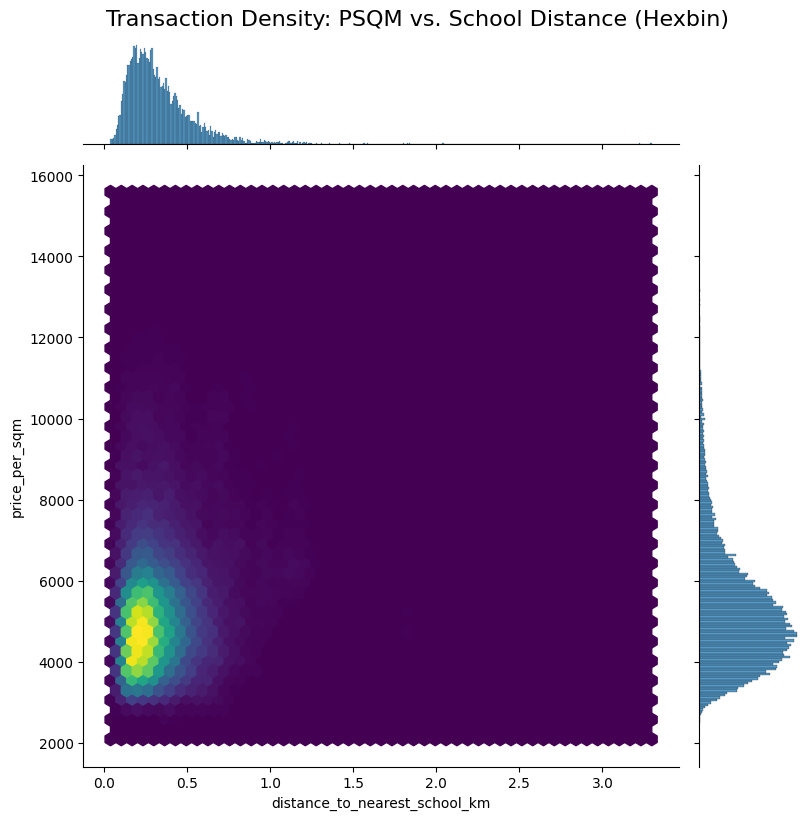

In [ ]:
# Create the Joint Plot using the 'hex' kind
# 'hex' creates a heatmap using hexagons, showing density clearly
sns.jointplot(
    data=df_final,
    x='distance_to_nearest_school_km',
    y='price_per_sqm',
    kind='hex',
    height=8,
    cmap='viridis' # A visually appealing color map
)

plt.suptitle(
    'Transaction Density: PSQM vs. School Distance (Hexbin)',
    y=1.02,
    fontsize=16
)
plt.show()

### **Strong Price Premium:** The highest density of transactions is clustered tightly between $0.0 \text{ km}$ and $0.6 \text{ km}$ distance and in the high PSQM range ($\text{S\$4,000/sqm}$ to $\text{S\$8,000/sqm}$), confirming a significant price premium for close school proximity.

### **Price Decay:** As the distance to the nearest school increases (moving past $1.0 \text{ km}$), the density of transactions quickly fades, and the density does not extend to the highest PSQM levels.

### **Market Concentration:** The visualization confirms that the vast majority of housing transactions ($>90\%$) occur within $1.0 \text{ km}$ of a school, highlighting the importance of this amenity in the market.

In [ ]:
# Define the features to compare (assuming these are defined elsewhere)
distance_features = [
    'distance_to_nearest_mrt_km',
    'distance_to_nearest_mall_km',
    'distance_to_nearest_school_km'
]
PRICE_FEATURE = 'price_per_sqm' # Assuming this is the correct column name

# --- Performance Enhancement: Sample Data ---
# 1. CHANGE: Sample is now created from df_final
df_sample = df_final.sample(n=50000, random_state=42)

# Create a figure with 1 row and 3 columns (subplots)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Comparative Impact of Proximity on Price Efficiency (PSQM)', fontsize=16)

# 2. CHANGE: Min/max values are retrieved from the sampled data (which came from df_final)
y_min = df_sample[PRICE_FEATURE].min()
y_max = df_sample[PRICE_FEATURE].max()

# Iterate through the distance features to create each plot
for i, feature in enumerate(distance_features):
    ax = axes[i]

    # Create the Regression Plot for the current feature
    sns.regplot(
        data=df_sample, # Plotting uses the sample derived from df_final
        x=feature,
        y=PRICE_FEATURE,
        ax=ax,
        scatter_kws={'alpha': 0.05, 's': 5, 'color': 'gray'}, # Use small, transparent dots
        line_kws={'color': 'red', 'lw': 3}, # Bold red line for the trend
        ci=95, # Show confidence interval
    )

    # Set titles and labels
    # Use only the last word of the feature name for cleaner labels (e.g., 'mrt')
    # Use .upper() and .capitalize() for clean titles
    label = feature.split('_')[-2]
    ax.set_title(f'Vs. {label.upper()}', fontsize=14)
    ax.set_xlabel(f'Distance to Nearest {label.capitalize()} (km)')
    ax.set_ylabel('Price Per Sqm (S$)')
    ax.set_ylim(y_min, y_max * 1.05) # Consistent Y-axis scale is KEY for comparison

# Improve layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
plt.show()

### **School Proximity (Highest Premium):** The highest PSQM density is concentrated in a very narrow band: $\mathbf{0.0 \text{ km} \text{ to } 0.6 \text{ km}}$ from a school. This confirms that the price premium for school access is highly localized.This localized premium is substantial, as the highest PSQM sales cluster in this immediate zone.The premium decays rapidly and substantially; its strong influence virtually disappears past the $\mathbf{1.0 \text{ km}}$ mark.

### **MRT Proximity (Fundamental Driver):** The price efficiency of a property is fundamentally tied to its proximity to the MRT.The regression line shows a consistent negative correlation (price decreases as distance increases), establishing transit accessibility as a non-negotiable factor that supports the base value of a property.The penalty (price drop) for moving away from an MRT is faster and more severe than the penalty for moving away from a Mall, indicating that transit access is the higher priority of the two.

### **Scarcity and Dual Accessibility:** The absolute highest PSQM properties require $\mathbf{dual proximity}$: they must be close to both the MRT and a Mall ($\mathbf{X < 0.5 \text{ km}}$ and $\mathbf{Y < 0.5 \text{ km}}$).Due to the scarcity of these perfect locations, the market assigns the ultimate price premium to the few properties that achieve this balance.When forced to choose between amenities, transit (MRT) is often prioritized over commercial amenities (Mall), meaning proximity to the train line supports a higher price floor.

In [ ]:
# Define the features
X_FEATURE = 'distance_to_nearest_mrt_km'
Y_FEATURE = 'distance_to_nearest_mall_km'

# Select key towns for the facet grid (strategic sample for clear comparison)
key_towns = ['BISHAN', 'PUNGGOL', 'TAMPINES', 'BUKIT MERAH']

# Filter the data to include only the selected towns (assumes df_final is the main DataFrame)
df_facet = df_final[df_final['town'].isin(key_towns)].copy()

# Create the FacetGrid object
g = sns.FacetGrid(
    df_facet,
    col='town',
    col_wrap=2,
    height=5,
    aspect=1.2, # Width-to-height ratio
    sharex=True,
    sharey=True
)

# Map the density plot (KDE contours) onto the grid
# This visualizes the clustering of transactions (density) across the two distances
g.map(
    sns.kdeplot,
    X_FEATURE,
    Y_FEATURE,
    fill=True,
    cmap='viridis',
    levels=10,
    alpha=0.8
)

# Enhance plot appearance
# Set the main title
g.fig.suptitle('Location Trade-Off Density by Selected Town', y=1.02, fontsize=16)

# Set the axis labels across the entire grid
g.set_axis_labels('Distance to Nearest MRT (km)', 'Distance to Nearest Mall (km)')

# Adjust the subplot titles (set to the town name)
g.set_titles("Town: {col_name}")

plt.show()

# **Why we chose these locations**
### **Strategic Contrast:** The selection of Bishan, Punggol, Tampines, and Bukit Merah provides a strategic cross-section of Singapore’s HDB landscape to maximize insight into the accessibility trade-off.

### **Maturity and Planning Focus:** Bishan and Bukit Merah were chosen as examples of mature, high-value estates. Analyzing them helps identify the optimal dual proximity found in land-scarce, established areas.

### Punggol represents a new, peripheral town, allowing the analysis of modern accessibility strategies and infrastructure planning trends.

### **Regional Dominance:** Tampines was included as a successful regional center to gauge if its strong, self-sufficient commercial amenities reduce the buyer's dependency on proximity to the central MRT lines.

# **What the graphs tell us**



### **Bishan (Ideal Optimization):** The tight, centralized cluster near the origin (0 km MRT, 0 km Mall) signifies Optimized Dual Proximity. This shape is the visual fingerprint of successful, efficient mature urban planning, leading to high location value.

### **Tampines (Regional Balance):** The elongated, dense cluster shows a deliberate Balanced Trade-Off. Planning successfully integrated commerce and transport across a large area, confirming its status as a self-sufficient regional hub.

### **Bukit Merah / Punggol (Constraints & Spread):** The wide, dispersed, or multi-clustered shapes reflect Geographical Spread or Planning Constraints. This indicates a lack of uniform dual proximity, where residents are forced to make clear trade-offs between transport and amenities.

In [ ]:
df_final.head()
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 75 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   month                          194170 non-null  datetime64[ns]
 1   block                          194170 non-null  object        
 2   street_name                    194170 non-null  object        
 3   storey_range                   194170 non-null  object        
 4   floor_area_sqm                 194170 non-null  float64       
 5   flat_model                     194170 non-null  object        
 6   lease_commence_date            194170 non-null  int64         
 7   resale_price                   194170 non-null  float64       
 8   price_per_sqm                  194170 non-null  float64       
 9   trans_year                     194170 non-null  int32         
 10  flat_age                       194170 non-null  int64         
 11  

In [ ]:
df_final.to_csv("df_final.csv", index=False)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd

drop_cols = [
    # identifiers
    'month', 'block', 'street_name', 'full_address', 'postal_code', 'storey_range','town',

    # redundant categorical (keep either one-hot or raw)
    'town', 'flat_type', 'nearest_mrt_name', 'nearest_school_name', 'nearest_mall_name_x',

    # redundant lease/age features (keep only one)
    'remaining_lease', 'lease_commence_date','schools_within_1km','flat_model'
    'schools_within_1_2km',

    # derived target-related
    'price_per_sqm','trans_year',




    # raw coordinates
    'latitude', 'longitude',
    'nearest_mrt_lat', 'nearest_mrt_lng',
    'nearest_school_lat', 'nearest_school_lon',
    'nearest_mall_lat', 'nearest_mall_lon',

    # names/labels
    'nearest_mrt_name', 'nearest_school_name', 'nearest_mall_name', 'nearest_mall_name'
]
df_model2 = df_final.drop(columns = drop_cols, errors = 'ignore')



In [ ]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   floor_area_sqm                 194170 non-null  float64
 1   flat_model                     194170 non-null  object 
 2   resale_price                   194170 non-null  float64
 3   flat_age                       194170 non-null  int64  
 4   remaining_lease_years          194170 non-null  float64
 5   town_median_psqm               194170 non-null  float64
 6   town_mean_psqm                 194170 non-null  float64
 7   town_avg_lease                 194170 non-null  float64
 8   town_count                     194170 non-null  int64  
 9   flat_type_median_psqm          194170 non-null  float64
 10  flat_type_mean_psqm            194170 non-null  float64
 11  flat_type_avg_lease            194170 non-null  float64
 12  flat_type_count               

In [ ]:
df_model2['flat_model'].unique()

array(['Improved', 'New Generation', 'DBSS', 'Standard', 'Apartment',
       'Simplified', 'Model A', 'Premium Apartment', 'Adjoined flat',
       'Model A-Maisonette', 'Maisonette', 'Type S1', 'Type S2',
       'Model A2', 'Terrace', 'Improved-Maisonette', 'Premium Maisonette',
       'Multi Generation', 'Premium Apartment Loft', '2-room', '3Gen'],
      dtype=object)

In [ ]:
df_model2.isna().sum()

,0
floor_area_sqm,0
flat_model,0
resale_price,0
flat_age,0
remaining_lease_years,0
town_median_psqm,0
town_mean_psqm,0
town_avg_lease,0
town_count,0
flat_type_median_psqm,0


In [ ]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   floor_area_sqm                 194170 non-null  float64
 1   flat_model                     194170 non-null  object 
 2   resale_price                   194170 non-null  float64
 3   flat_age                       194170 non-null  int64  
 4   remaining_lease_years          194170 non-null  float64
 5   town_median_psqm               194170 non-null  float64
 6   town_mean_psqm                 194170 non-null  float64
 7   town_avg_lease                 194170 non-null  float64
 8   town_count                     194170 non-null  int64  
 9   flat_type_median_psqm          194170 non-null  float64
 10  flat_type_mean_psqm            194170 non-null  float64
 11  flat_type_avg_lease            194170 non-null  float64
 12  flat_type_count               

In [ ]:
num_cols = df_model2.select_dtypes(include=['int64','float64']).columns

df_model2[num_cols] = df_model2[num_cols].fillna(df_model2[num_cols].median())


In [ ]:

X = df_model2.drop("resale_price", axis=1)
y = df_model2["resale_price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:

# Build and train Random Forest
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("MAPE:", round(mape, 2), "%")
print("MSE:", round(mse,2))
print("RMSE:", round(rmse,2))




rf_importances = pd.Series(
    model.feature_importances_,
    index=X_train.columns[:len(model.feature_importances_)]  # align lengths
).sort_values(ascending=False).head(10)

print("\nTop 10 RF Feature Importances:\n", rf_importances)


MAE: 24430.39641010658
R²: 0.9598046266159846
MAPE: 4.93 %
MSE: 1254322317.46
RMSE: 35416.41

Top 10 RF Feature Importances:
 floor_area_sqm                   0.430407
town_mean_psqm                   0.179597
remaining_lease_years            0.086899
flat_age                         0.070827
town_avg_lease                   0.033177
distance_to_nearest_mrt_km       0.033045
distance_to_nearest_mall_km      0.030647
storey_avg                       0.025045
distance_to_nearest_school_km    0.022323
flat_model_encoded               0.017765
dtype: float64


In [ ]:

# --- XGBoost ---
model2 = XGBRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=1,
    random_state=42,
    n_jobs=-1
)

model2.fit(X_train, y_train)

# Predict
y_pred = model2.predict(X_test)

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# Evaluate
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("MAPE:", round(mape, 2), "%")
print("MSE:", round(mse,2))
print("RMSE:", round(rmse,2))

xgb_importances = pd.Series(
    model2.feature_importances_,
    index=X_train.columns[:len(model2.feature_importances_)]  # align lengths
).sort_values(ascending=False).head(10)
print("\nTop 10 XGB Feature Importances:\n", xgb_importances)


MAE: 35069.40297732013
R²: 0.9280898315909338
MAPE: 7.24 %
MSE: 2244002766.84
RMSE: 47370.91

Top 10 XGB Feature Importances:
 flat_type_mean_psqm      0.395249
town_mean_psqm           0.290297
floor_area_sqm           0.050200
flat_type_avg_lease      0.042167
flat_type_count          0.039324
town_avg_lease           0.022599
flat_type_median_psqm    0.019811
storey_avg               0.013051
remaining_lease_years    0.010921
town_median_psqm         0.009871
dtype: float32


OLD Result before using GridSearchCV

MAE: 39058.371749578335
R²: 0.9127743062107713
MAPE: 8.04 %
MSE: 2721933525.3
RMSE: 52172.15

Top 10 XGB Feature Importances:
 flat_type_mean_psqm    0.284572
flat_type_4 ROOM       0.211304
flat_type_count        0.136116
town_mean_psqm         0.126720
flat_type_avg_lease    0.038288
floor_area_sqm         0.034505
town_avg_lease         0.018274
storey_avg             0.011558
town_BUKIT TIMAH       0.011279



New Result after using GridSearchCV
MAE: 35069.40297732013
R²: 0.9280898315909338
MAPE: 7.24 %
MSE: 2244002766.84
RMSE: 47370.91

Top 10 XGB Feature Importances:
 flat_type_mean_psqm      0.395249
town_mean_psqm           0.290297
floor_area_sqm           0.050200
flat_type_avg_lease      0.042167
flat_type_count          0.039324
town_avg_lease           0.022599
flat_type_median_psqm    0.019811
storey_avg               0.013051
remaining_lease_years    0.010921
town_median_psqm         0.009871
dtype: float32

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso


ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.01).fit(X_train, y_train)


numeric_features = X.columns
scaler = ColumnTransformer(
    transformers=[("num", StandardScaler(), numeric_features)],
    remainder="passthrough"
)

lr_pipeline = Pipeline(steps=[
    ("preprocessor", scaler),
    ("model", LinearRegression())
])


# evaluation
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("MAPE:", round(mape, 2), "%")
print("MSE:", round(mse,2))
print("RMSE:", round(rmse,2))

MAE: 24430.39641010658
R²: 0.9598046266159846
MAPE: 4.93 %
MSE: 1254322317.46
RMSE: 35416.41


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.111e+14, tolerance: 4.858e+11
  model = cd_fast.enet_coordinate_descent(


In [ ]:

results_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

# Add residuals (error = actual - predicted)
results_df["Residual"] = results_df["Actual"] - results_df["Predicted"]

# Preview first 10 rows
print(results_df.head(10))

     Actual     Predicted      Residual
0  265000.0  233784.34375   31215.65625
1  368000.0  462566.00000  -94566.00000
2  828000.0  774673.62500   53326.37500
3  688888.0  650841.68750   38046.31250
4  410000.0  400896.09375    9103.90625
5  495000.0  500877.15625   -5877.15625
6  500000.0  596197.37500  -96197.37500
7  408000.0  377909.68750   30090.31250
8  460000.0  551767.31250  -91767.31250
9  516000.0  635533.43750 -119533.43750


In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color="red")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")

In [ ]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   floor_area_sqm                 194170 non-null  float64
 1   flat_model                     194170 non-null  object 
 2   resale_price                   194170 non-null  float64
 3   flat_age                       194170 non-null  int64  
 4   remaining_lease_years          194170 non-null  float64
 5   town_median_psqm               194170 non-null  float64
 6   town_mean_psqm                 194170 non-null  float64
 7   town_avg_lease                 194170 non-null  float64
 8   town_count                     194170 non-null  int64  
 9   flat_type_median_psqm          194170 non-null  float64
 10  flat_type_mean_psqm            194170 non-null  float64
 11  flat_type_avg_lease            194170 non-null  float64
 12  flat_type_count               

In [ ]:
import joblib
import os

In [ ]:
del dfmodel3

In [ ]:
dfmodel3 = df_model2.copy()
dfmodel3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194170 entries, 0 to 194169
Data columns (total 51 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   floor_area_sqm                 194170 non-null  float64
 1   flat_model                     194170 non-null  object 
 2   resale_price                   194170 non-null  float64
 3   flat_age                       194170 non-null  int64  
 4   remaining_lease_years          194170 non-null  float64
 5   town_median_psqm               194170 non-null  float64
 6   town_mean_psqm                 194170 non-null  float64
 7   town_avg_lease                 194170 non-null  float64
 8   town_count                     194170 non-null  int64  
 9   flat_type_median_psqm          194170 non-null  float64
 10  flat_type_mean_psqm            194170 non-null  float64
 11  flat_type_avg_lease            194170 non-null  float64
 12  flat_type_count               

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd


# --- Step 2: Reverse one-hot encoding for categorical variables ---

# Town
town_cols = [c for c in dfmodel3.columns if c.startswith('town_')]
if town_cols:
    dfmodel3['town'] = dfmodel3[town_cols].idxmax(axis=1).str.replace('town_', '', regex=False)


# Flat type
flat_type_cols = [c for c in dfmodel3.columns if c.startswith('flat_type_')]
if flat_type_cols:
    dfmodel3['flat_type'] = dfmodel3[flat_type_cols].idxmax(axis=1).str.replace('flat_type_', '', regex=False)


# --- Step 3: Drop original one-hot columns ---
dfmodel3 = dfmodel3.drop(columns=town_cols + flat_type_cols, errors='ignore')


# --- Step 4: Define numeric and categorical features safely ---
numeric_features = [
    'floor_area_sqm', 'flat_age', 'remaining_lease_years',
    'town_median_psqm', 'town_mean_psqm', 'town_avg_lease', 'town_count',
    'flat_type_median_psqm', 'flat_type_mean_psqm', 'flat_type_avg_lease', 'flat_type_count',
    'storey_avg', 'distance_to_nearest_mrt_km', 'distance_to_nearest_school_km', 'distance_to_nearest_mall_km'
]


# Keep only columns that exist
numeric_features = [c for c in numeric_features if c in dfmodel3.columns]


categorical_features = ['town', 'flat_type']
categorical_features = [c for c in categorical_features if c in dfmodel3.columns]


# Target
target = 'resale_price'


# --- Step 5: Split into X and y ---
X = dfmodel3[numeric_features + categorical_features]
y = dfmodel3[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- Step 6: Preprocessor ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


# --- Step 7: Pipeline with Random Forest ---
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1))
])


# --- Step 8: Fit model ---
pipeline.fit(X_train, y_train)


# --- Step 9: Predict ---
y_pred = pipeline.predict(X_test)


# --- Step 10: Metrics ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)


print("MAE:", round(mae, 2))
print("R²:", round(r2, 4))
print("MAPE:", round(mape, 2), "%")
print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))


MAE: 31677.06
R²: 0.9234
MAPE: 6.37 %
MSE: 2391109847.11
RMSE: 48898.98


In [ ]:
def predict_price (raw_data, model_path):
  if isinstance(raw_data, dict):
    new_data = pd.DataFrame([raw_data])


  elif isinstance(raw_data, pd.DataFrame):
    new_data = raw_data.copy()


  else:
    raise ValueError("Input must be a dictionary or DataFrame")


  required_keys = numeric_features + categorical_features
  missing_keys = [key for key in required_keys if key not in new_data.columns]


  if missing_keys:
    raise ValueError(f"Missing required keys: {missing_keys}")


  if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model not found at {model_path}")


  model = joblib.load(model_path)

  return model.predict(new_data)




